# <center>ADM: Homework 2: Instagram Profiles & Posts</center>

* <b>Name: </b>Giulia Iadisernia         <b>Matricola</b>: 2065450 <b>Email: </b>iadisernia.2065450@studenti.uniroma1.it  <br>
* <b>Name: </b>Lorenzo Incoronato       <b>Matricola</b>: 1916863 <b>Email: </b>incoronato.1916863@studenti.uniroma1.it <br>
* <b>Name: </b>Javier Martinez Velasco   <b>Matricola</b>: 2058968 <b>Email: </b>martinezvelasco.2058968@studenti.uniroma1.it<br>

### <b>[RQ1]</b> After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods

In [1]:
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import os

In [2]:
#UPLOADING POSTS.CSV
fields = ["post_type", "numbr_likes","number_comments", "cts"]
df_instagram_posts_RQ1= pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = fields ,parse_dates=["cts"] )
df_instagram_posts_RQ1_info = pd.read_csv("~/instagram_posts.csv", sep = "\t" ,nrows = 1 ,parse_dates=["cts"])
#DATA CLEANING 
df_instagram_posts_RQ1.numbr_likes.fillna(0, inplace = True)
df_instagram_posts_RQ1.number_comments.fillna(0, inplace = True)
#ASSIGNING VARIABLES
likes = df_instagram_posts_RQ1.numbr_likes
post_type = df_instagram_posts_RQ1.post_type
comments = df_instagram_posts_RQ1.number_comments
date = df_instagram_posts_RQ1.cts

<h3 style="font-size: 22px; color: #00009B"> RQ1.1 EDA on instagram_posts.csv</h3>

#### Dataset Variables
<b>SID</b>: Sequence ID <br>
<b>sid_profile</b>: Sequence ID of the profile from ## Profiles tab key <br>
<b>post_id</b>: Instagrams ID <br>
<b>profile_id</b>: Instagrams ID may be null <br>
<b>location_id</b>: Instagrams ID <br>
<b>cts</b>: Timestamp when the Post was created <br>
<b>post_type</b>: 1 - Photo, 2 - Video, 3 - multy <br>
<b>description</b>: May contain '\n' <br>
<b>numbr_likes</b>: Number of Likes at the moment it was visited <br>
<b>number_comments</b>: Number of comments at the moment it was visited <br>

#### Which variables will be considered for instagram_post.csv EDA?

The original dataset includes 10 variables, 6 of which don't provide any useful information by analyzing them numerically: "SID", "sid_profile", "post_id", "profile_id" and "location_id". Regarding "description", up to this point we don't have the required honwledge and tools to perform text mining and extract insights from this variable. Therefore, the exploratory data analysis will be performed over the remaining 4 variables: "post_type", "numbr_likes", "number_comments" and "cts". 

### Variables and data types

Here we can observe the different data types of the variables. Since the variables post_type, numbr_likes and number_comments are actually discrete, we could transform them into integer values in a later data cleaning stage. 

In [7]:
df_instagram_posts_RQ1_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              1 non-null      int64 
 1   sid_profile      1 non-null      int64 
 2   post_id          1 non-null      object
 3   profile_id       1 non-null      int64 
 4   location_id      1 non-null      int64 
 5   cts              1 non-null      datetime64[ns]
 6   post_type        1 non-null      int64 
 7   description      1 non-null      object
 8   numbr_likes      1 non-null      int64 
 9   number_comments  1 non-null      int64 
dtypes: int64(7), object(3)
memory usage: 208.0+ bytes


### Numerical Variables

##### <b>1. NUMBER OF LIKES</b>

<i>Summary Statistics</i><br>
"numbr_likes" is a numerical discrete variable that indicates the amount of likes a certain post has obtained. By looking (table below) at the main summary values from the distribution we observe a big range from 0 to near 8M likes. However, 75% of the values lay below 114 likes and the mode is 12 likes. This suggests that the current mean (283) might not the best measure of expection for this distribution (this value is probably too high). Therefore, for a better summary of the distribution, outliers should be identified.

In [23]:
print("mode          ", likes.mode()[0])
likes.describe().apply(lambda x: format(x, 'f'))

mode           12.0


count    42710197.000000
mean          283.502807
std          6124.608652
min             0.000000
25%            20.000000
50%            46.000000
75%           114.000000
max       8822952.000000
Name: numbr_likes, dtype: object

<i>Outliers</i><br>
In the output below, by obtaining the higher quantiles of the distribution we can clearly observe the <b>presence of outliers</b>. The quantile at percentile 0.95 shows that 95% of the total dataset posts(40,574.687) have received less than 471 likes.  
By using the Interquartile Rule to Find Outliers we find out that in the right tail of the distribution, around 10% of the population are outliers. **This is an extremely high number of outliers**, which we believe is related to the nature of the distribution (close to an exponential) and the big sample size, which shows a high variation of likes in the population.<br>

* IQR * 1.5 + Q3 = (114-20) * 1.5 + 114  = 255 <br>
* Percentile 90 = 256 <br>
* Therefore, 10% of the right tail of the distribution can be consider outliers

Percentile       Quantile
0.500000         46.000000
0.900000        256.000000
0.950000        471.000000
0.990000       2875.000000
0.999000      30636.000000
0.999900     181821.941200
0.999999    2028103.073639
1.000000    8822952.000000
Name: numbr_likes, dtype: object


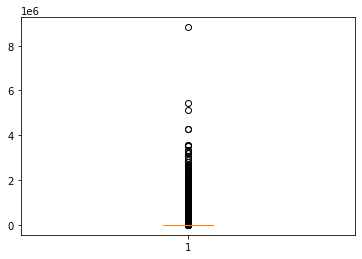

In [27]:
print("Percentile       Quantile")
print(likes.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]).apply(lambda x: format(x, 'f')))
plt.boxplot(likes)
plt.show()

<i>Distribution of the Variable</i><br>
When ploting the distribution we observe its exponential nature, with a highly positive skew and leptokurtosis. In this barplot we "zoom" on the 95% left tail of the distribution, because it is more representative of the sample population.

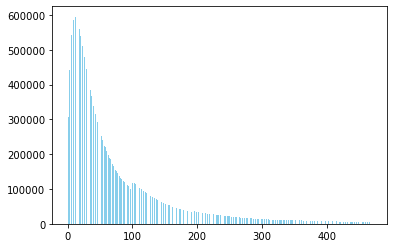

In [63]:
likes = df_instagram_posts_RQ1.numbr_likes
new_axis = likes[likes < 471]
unique,counts = np.unique(df_instagram_posts_RQ1.numbr_likes.values, return_counts=True)
try:
    plt.hist(new_axis,  bins='auto', normed=True , color = "skyblue")
except AttributeError:
    pass

##### <b>2. NUMBER OF COMMENTS</b>

<i>Summary Statistics</i><br>
We procede similarly with the variable "number_comments", which is a numerical discrete variable that indicates the amount of comments a certain post has obtained. We observe a range from 0 to near 488953 comments. We notice that 75% of the values lay below 5 comments and the mode is 0 comments. This suggests that the mean (7.59) might not the best measure of expection for this distribution (this value is probably too high). For a better summary of the distribution we proceed on identifying the outliers.

In [12]:
print("mode          ", comments.mode()[0])
comments.describe().apply(lambda x: format(x, 'f'))

mode           0.0


count    42710197.000000
mean            7.595301
std           194.147559
min             0.000000
25%             0.000000
50%             2.000000
75%             5.000000
max        488953.000000
Name: number_comments, dtype: object

<i>Outliers</i><br>
As with the number of likes, in the output below we can clearly observe the <b>presence of outliers</b>. The quantile at percentile 0.99 shows that 99% of the total dataset posts(40,574.687) have received less than 77 comments. Applying the interquartile rule we find out that, as happens with the number of likes, around 10% of the data are outliers:
* IQR * 1.5 + Q3 = (5-0) * 1.5 + 5  = 12.5 <br>
* Percentile 90 = 13 <br>
* Therefore, around 10% of the right tail of the distribution can be consider outliers

Percentile       Quantile
0.500000         2.000000
0.900000        13.000000
0.950000        23.000000
0.990000        77.000000
0.999000       462.000000
0.999900      2859.980400
0.999999     73893.938977
1.000000    488953.000000
Name: number_comments, dtype: object


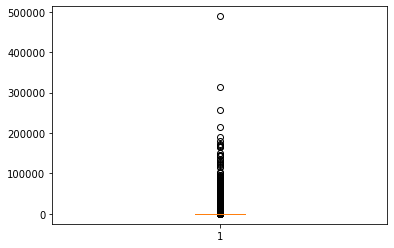

In [5]:
print("Percentile       Quantile")
print(comments.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]).apply(lambda x: format(x, 'f')))
plt.boxplot(comments)
plt.show()

<i>Distribution of the Variable</i><br>
When ploting the distribution we observe it is very similar to the variable <i>number of likes</i> in terms of shape and skewness. 

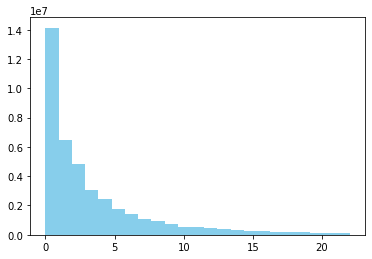

In [31]:
zoom_distro = comments[comments < 23]
unique,counts = np.unique(df_instagram_posts_RQ1.number_comments, return_counts=True)
try:
    plt.hist(zoom_distro,  bins=23 ,normed=True, color = "skyblue")
except AttributeError:
    pass

### Categorical Variables

<b>POST TYPES</b> <br>
<i>Summary Statistics</i><br>This is a categorical variable which indicates the kind of post a user has published (1: photo, 2: video, 3: mixed). The mean is very close to 1, which means that photos are the most common type of post. In fact, at least 75% of the users choosed pictures as post type.

In [21]:
post_type.describe().apply(lambda x: format(x, 'f'))

count    42710197.000000
mean            1.028486
std             0.172023
min             1.000000
25%             1.000000
50%             1.000000
75%             1.000000
max             3.000000
Name: post_type, dtype: object

<i>Distribution of the Variable</i><br>When plotting the distribution of the variable, we can observe that near to 40 million posts are photos, and videos and mixed content (together) represent about 3% of the total posts.

Photos represent 0.972 % of the dataset.
Videos represent 0.027 % of the dataset.
Mixed content represent 0.001 % of the dataset.


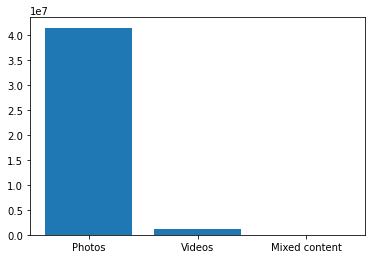

In [22]:
post,count = np.unique(post_type.values, return_counts=True)
postype = ["Photos","Videos","Mixed content"]
plt.bar(postype,count)
perc = count/42710197
[print(postype[i], "represent" , round(perc[i],3), "% of the dataset.") for i in range(len(perc))][0]

### Dates

##### <b>CTS</b>

<i>Summary Statistics</i><br>
'cts' is a variable that indicates the date and time a certain post was posted on Instagram. By looking at the table below we can see that the first post in our dataset was uploaded on 2010-07-19 at 01:12:23 while the last one was posted the day 2019-08-30 at 11:36:08.
We also observe that the time when most posts were posted in the same second has been the day 2019-05-29 at 23:41:46, when 29 posts were posted in the same moment.

In [32]:
date.describe()

count                42706865
unique               24181497
top       2019-05-29 23:41:46
freq                       29
first     2010-07-19 01:12:23
last      2019-08-30 11:36:08
Name: cts, dtype: object

In the following table we observe that, starting from 2010 with a minimum of 98 posts, every following year the number of post uploaded on instagram increased, reaching a maximum of 30215310 posts uploaded in 2019.

In [52]:
date.dt.year.value_counts()

2019.0    30215310
2018.0     8403250
2017.0     2505120
2016.0      986633
2015.0      383953
2014.0      142552
2013.0       51962
2012.0       16810
2011.0        1177
2010.0          98
Name: cts, dtype: int64

<i>Distribution of the Variable</i><br>
We plot below the distribution of the posts' years, and we notice its exponential growth, most likely due to the highly increasing relevance that this social network has been acquiring during the last years. Although maybe the reason is just that the data collection method was more focused on 2019 posts.

<BarContainer object of 10 artists>

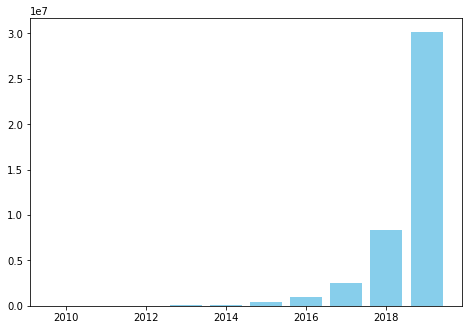

In [73]:
posts=list(date.dt.year.value_counts())
years=[int(i) for i in range(2019,2009,-1)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(years,posts,color='skyblue')

### Correlation

When plotting the numerical and categorical variables in a correlation matrix we don't observe any clear relation between the variables.

In [28]:
df_instagram_posts_RQ1.corr()

,post_type,numbr_likes,number_comments
post_type,1.000000,0.002544,0.002800
numbr_likes,0.002544,1.000000,0.374453
number_comments,0.002800,0.374453,1.000000


<h3 style="font-size: 22px; color: #00009B"> RQ1.2 EDA on instagram_profiles.csv</h3>

In [32]:
#Import the dataset df_instagram_profiles.csv
df_instagram_profiles_RQ1 = pd.read_csv("~/instagram_profiles.csv", delimiter = "\t")

#### Dataset `df_instagram_profiles` description

  * `sid`: sequence id `(float)`
  * `profile_id`: instagram orofile id `(float)`
  * `profile_name`: instagram profile name `(string)`
  * `firstname_lastname`: user's firstname and lastname `(string)`
  * `description`: user's instagram profile description `(string)`
  * `following`: number of following at the moment it was visited `(float)`
  * `followers`: number of followers at the moment it was visited `(float)`
  * `n_posts`: number of posts at the moment it was visited `(float)`
  * `url`: url `(string)`
  * `cts`: Timestamp when the profile was visited `(object)`
  * `is_business_account`: Boolean variable that indicates whether that profile was makred by the owner as business account or not `{False, True}`

### Numerical variables

In [17]:
df_instagram_profiles_RQ1['sid'] = df_instagram_profiles_RQ1['sid'].astype(str)
df_instagram_profiles_RQ1['profile_id'] = df_instagram_profiles_RQ1['profile_id'].astype(str)
df_instagram_profiles_RQ1 = df_instagram_profiles_RQ1.astype({'following': 'int', 'followers': 'int', 'n_posts': 'int'}, errors = 'ignore')
df_instagram_profiles_RQ1.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,following,followers,n_posts
count,3452771,3452771,3452771
mean,1406,4740,410
std,8113,193909,1042
min,0,0,0
25%,356,159,22
50%,754,406,120
75%,1573,974,420
max,4191080,285457645,183730


In order to visualize the distribution of the variables, we have defined the function `Hist(df_var, xlabel, title, col, n_bins, log_trans = False)` which returns an histogram of that specific variable `df_var`.<br>
Note: We apply the **log-transformation** when the data is strongly skewed.

In [4]:
def hist(df_var, xlabel, title, col, n_bins, log_trans = False):
    df_var.plot(kind = 'hist', color = col, bins = n_bins, logy = log_trans, ec = 'black')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

<b>1. FOLLOWERS</b> <br>
<i>Distribution of the variable</i>

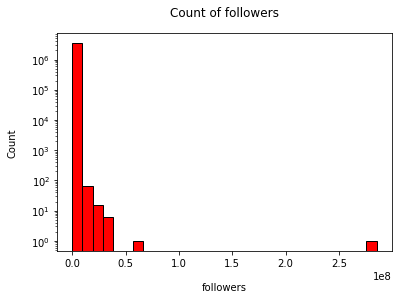

In [14]:
hist(df_instagram_profiles_RQ1['followers'], "followers", "Count of followers", col = "red", n_bins = 30, log_trans = True)

In the histogram below we can observe the distribution of the variable when it takes values less than ten thousand (`Followers < 10,000`) which is the interval where lays most of the mass of the distribution.

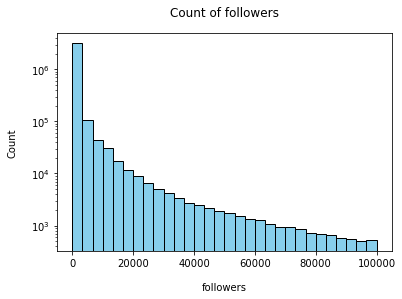

In [15]:
hist(df_instagram_profiles_RQ1.followers[df_instagram_profiles['followers'] < 100000], "followers", "Count of followers", col = "skyblue", n_bins = 30, log_trans = True)

<b>2. FOLLOWING</b> <br>

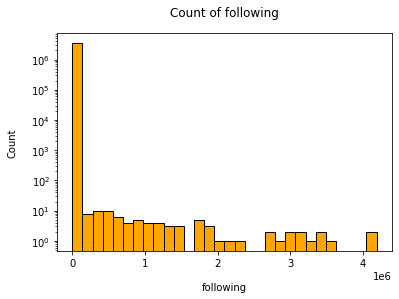

In [47]:
hist(df_instagram_profiles_RQ1['following'], "following", "Count of following", col = "orange", n_bins = 30, log_trans = True)

<b>3. NUMBER OF POSTS</b> <br>

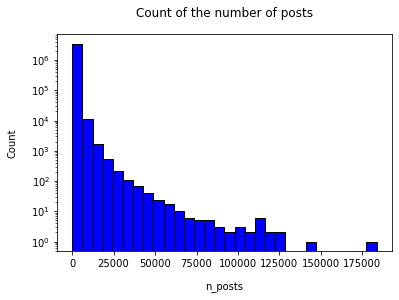

In [48]:
hist(df_instagram_profiles_RQ1['n_posts'], "n_posts", "Count of the number of posts", col = "blue", n_bins = 30, log_trans = True)

### Categorical variables

By observing the "top" row in the summary below, we learn that the most common name in the dataset is Sarah, or that the most used term in the descriptions is the emoji "🖤".

In [25]:
df_instagram_profiles_RQ1.describe(include = 'all')

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
count,4.509586e+06,4.477139e+06,4509586,4221121,2453590,3.452771e+06,3.452771e+06,3.452771e+06,870274,4071098,3445323
unique,NaN,NaN,4508180,3526944,2376474,NaN,NaN,NaN,841652,4062921,2
top,NaN,NaN,chkanyc,Sarah,🖤,NaN,NaN,NaN,gmail.com,2019-07-01 02:26:35.268 -0400,False
freq,NaN,NaN,4,2340,868,NaN,NaN,NaN,3437,6,2590069
mean,2.255992e+06,3.083302e+09,NaN,NaN,NaN,1.405641e+03,4.739899e+03,4.095414e+02,NaN,NaN,NaN
std,1.301807e+06,4.266575e+10,NaN,NaN,NaN,8.113473e+03,1.939087e+05,1.041940e+03,NaN,NaN,NaN
min,1.186000e+03,4.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.128596e+06,2.735177e+08,NaN,NaN,NaN,3.560000e+02,1.590000e+02,2.200000e+01,NaN,NaN,NaN
50%,2.255992e+06,1.649248e+09,NaN,NaN,NaN,7.540000e+02,4.060000e+02,1.200000e+02,NaN,NaN,NaN
75%,3.383389e+06,5.514691e+09,NaN,NaN,NaN,1.573000e+03,9.740000e+02,4.200000e+02,NaN,NaN,NaN


In order to plot categorical variables, let's define the function `bar_binary(df_var, xlabel, title, col)` that returns the bar chart of the binary variable `df_var`.

In [28]:
def bar_binary(df_var, xlabel, title, col):
    count = df_var.value_counts()
    count.plot(kind = 'bar', color = col, ec = 'purple')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

##### **IS_BUSINESS_ACCOUNT**

The main categorical variable in the dataset is <i>is_business_account</i> which takes boolean values. As we observe in the graph below, close to 75% of the accounts are personal, while 25% are business accounts.

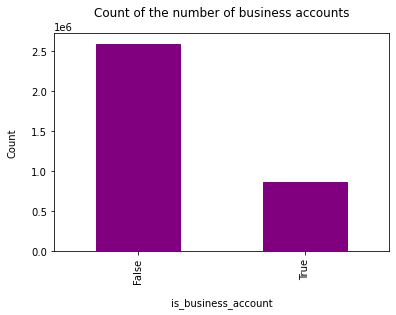

In [29]:
bar_binary(df_instagram_profiles_RQ1['is_business_account'], "is_business_account", "Count of the number of business accounts", "purple")

<h3 style="font-size: 22px; color: #00009B"> RQ1.3 EDA on locations.csv</h3>

In [30]:
# import the dataset df_instagram_locations
df_instagram_locations = pd.read_csv("~/instagram_locations.csv", delimiter = "\t")

#### Dataset `df_instagram_locations` description

* `sid`: sequence id `(string)`
* `id`: location id `(string)`
* `name`: location's name `(string)`
* `street`: street `(string)`
* `zip`: zip code `(string)`
* `city`: city name `(string)`
* `region`: region name `(string)`
* `cd`: country code `(string)`
* `phone`: phone in the same format as on Instagram `(string)`
* `aj_exact_city_match`: Instagram's internal key `{False, True}`
* `blurb`: description of the location `(string)`
* `dir_city_id`: Instagram's internal city id `(string)`
* `dir_city_slug`: city tag `(string)`
* `dir_country_id`: country id `(string)`
* `dir_country_name`: country name `(string)`
* `lat`: latitude `(float)`
* `lng`: longitute `(float)`
* `primary_alias_on_fb`: Boolean flag
* `website`: url to the website (it may contain more than one url)
* `cts`: timestamp when the location was visited `(pd object)`

### Numerical variables

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_instagram_locations['sid'] = df_instagram_locations['sid'].astype(str)
df_instagram_locations['id'] = df_instagram_locations['id'].astype(str)
df_instagram_locations.describe()

,lat,lng
count,1016495.00000,1016495.00000
mean,-15.29215,34.21718
std,76.15085,22.01081
min,-179.98300,-90.00000
25%,-80.15575,29.97555
50%,-2.45000,40.67820
75%,30.71740,48.84722
max,179.99412,89.99870


##### **Latitude**

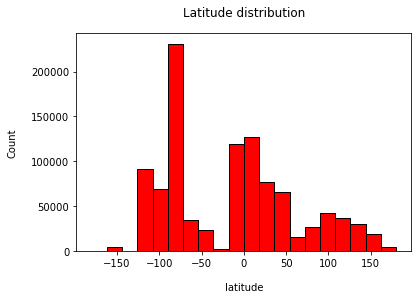

In [49]:
hist(df_instagram_locations['lat'], "latitude", "Latitude distribution", "red", n_bins = 20)

In [51]:
# most common latitude
df_instagram_locations['lat'].value_counts().idxmax()

37.6156

##### **Longitude**

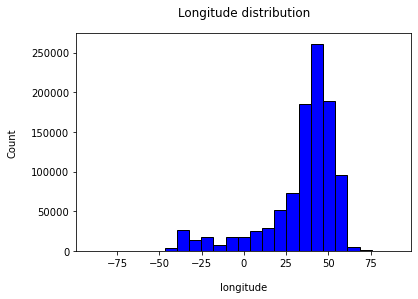

In [53]:
hist(df_instagram_locations['lng'], "longitude", "Longitude distribution", "blue", n_bins = 25)

In [16]:
# most common longitude
longitude.value_counts().idxmax()

55.7522

### Categorical variables

By looking at the main summary statistics of the categorical variables we learn that the average instragram user posts from the neighbourhood of <b>Hell's Kitchen, in New York (Eastern Province, US)</b>, most likely from a <b>Starbucks</b> .

In [55]:
df_instagram_locations.describe(include = 'all')

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
count,1022658,1022658,1022658,715704,715579,937166,1760,939010,601688,1000510,...,495698,495221,495628,495698,1016495.00000,1016495.00000,425531,941668,623262,1022658
unique,1022658,1022658,935776,656262,181474,118541,1743,245,577305,2,...,114996,114426,234,235,NaN,NaN,425486,833398,583671,1022298
top,719981,110296492939207,Starbucks,,10001,"New York, New York",Eastern Province,US,+44 345 748 4950,False,...,"Hells Kitchen, Manhattan",hells-kitchen-manhattan,US,United States,NaN,NaN,pandpnewcastle,-,http://www.starbucks.com/,2019-05-25 23:54:48.969
freq,1,1,1097,1652,1649,29954,4,331424,178,907651,...,1326,1326,170983,170983,NaN,NaN,2,6588,297,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-15.29215,34.21718,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.15085,22.01081,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-179.98300,-90.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-80.15575,29.97555,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.45000,40.67820,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.71740,48.84722,NaN,NaN,NaN,NaN


##### **aj_exact_city_match**

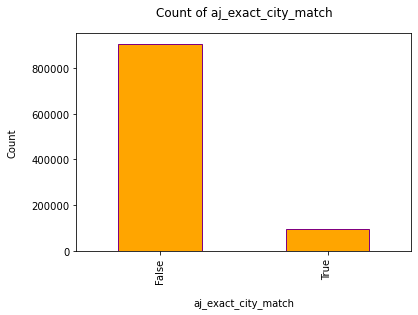

In [54]:
bar_binary(df_instagram_locations['aj_exact_city_match'], "aj_exact_city_match", "Count of aj_exact_city_match", "orange")

### <b>[RQ2]</b> Let's explore the dataset by finding simple insights regarding the profile and posts.

* **Missing values**
Before starting answering the questions, we perform some data cleaning tasks that will make our analysis less prompt to errors.

* Let's remove the columns that are not useful for our purposes:
  * `description` has 2055996 missing values
  * `url` has 3639312 missing values
* Replace `is_business_account missing` rows with `False` values
* Finally, let's remove the remaining rows with missing values

In [21]:
df_instagram_profiles.shape[0] # no. rows = 4,509,586
df_instagram_profiles.isna().sum() 

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [4]:
df_instagram_profiles_RQ2 = df_instagram_profiles.drop(['description', 'url'], axis = 1)
df_instagram_profiles_RQ2.is_business_account.fillna(False, inplace = True)
df_instagram_profiles_RQ2.dropna(axis = 0, how = 'any', inplace = True)
df_instagram_profiles_RQ2.shape[0] # no. rows = 3,130,712

Up to this point, we have removed 1,378.874 rows and 2 columns, obtaining as an output a more consistent dataset.

<b>2.1</b> Plot the number of posts for each profile in descending order

In [27]:
df_instagram_profiles_RQ2.sort_values(by = 'n_posts', ascending = False, inplace = True)
df_instagram_profiles_RQ2.n_posts = df_instagram_profiles_RQ2.n_posts.astype(int)
df_instagram_profiles_RQ2.n_posts

3990313    183730
2571453    142428
4338921    126340
3942129    125220
4219642    117262
            ...  
1786774         0
1711929         0
1446235         0
1446228         0
3719054         0
Name: n_posts, Length: 3130712, dtype: int64

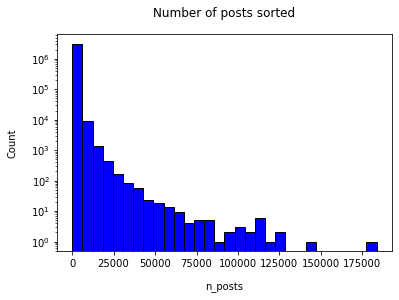

In [28]:
hist(df_instagram_profiles_RQ2['n_posts'], "n_posts", "Number of posts sorted", "blue", n_bins = 30, log_trans = True)

<b>2.2</b> What posts have the highest number of "likes"?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise) and, as with profiles.csv, we perform some data cleaning: we remove NaN values and make likes and comments type int, instead of float.

In [31]:
fields = ["numbr_likes", "number_comments"]
df_instagram_posts_RQ2_1 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)
df_instagram_posts_RQ2_1.shape[0] # no. of rows = 42,710,197
df_instagram_posts_RQ2_1.isna().sum()

numbr_likes        36
number_comments    36
dtype: int64

In [33]:
# delete the NaN values
df_instagram_posts_RQ2_1.dropna(axis = 0, how = 'any', inplace = True)
# transform float to integer number
df_instagram_posts_RQ2_1 = df_instagram_posts_RQ2_1.astype({'numbr_likes': 'int', 'number_comments': 'int'}, errors = 'ignore')

* `most_likes` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `numbr_likes` and then taking the first 10 posts (`.head(10)`) with the most likes.

In [35]:
most_likes = df_instagram_posts_RQ2_1.sort_values(by = 'numbr_likes', ascending = False).head(10)
most_likes

,numbr_likes,number_comments
19624085,8822952,165886
19623988,5447066,25303
19624082,5116398,40608
19623986,4271466,30770
39701024,4264745,18691
6293907,3586546,15405
19624086,3558599,15715
19802016,3533326,59475
30850564,3340297,149489
39812576,3311246,64318


<b>2.3</b> What posts have the most and the least number of comments?

* `most_comments` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the most comments.

In [36]:
most_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = False).head(10)
most_comments 

,numbr_likes,number_comments
41873060,38871,488953
12164781,81523,313997
33261751,54507,257488
11149127,331703,214365
9383817,23515,189888
5427268,129258,180635
25257169,684861,173988
6220011,2224495,170836
31689573,226336,166919
14257307,169791,166198


* `least_comments` is obtained by sorting in **ascending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the least comments.

In [15]:
least_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = True).head(10)
least_comments

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80,0
709,Bx-2z8Hhk1j,29,0
289,Bxr-ibHps7V,25,0
712,Bx5mknNBLCG,35,0
713,Bx3TT5TB3Tu,188,0
286,Bxztf_xlzLh,15,0
714,Bx0fZxkh-_4,134,0
284,Bx65tHPJH2S,18,0
283,ByA02DAl8SZ,19,0
282,ByCqFD-ASgn,9,0


<b>2.4</b> How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "location_id"]
df_instagram_posts_RQ2_3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [23]:
# includes tagged locations means location_name not Nan
count_tagged_location = df_instagram_posts_RQ2_3.loc[df_instagram_posts_RQ2_3['location_id'].notna()].shape[0] # 29,737,425
count_no_tagged_location = len(df_instagram_posts_RQ2_3) - count_tagged_location # 12,972,772

print("The number of posts     containing tagged locations is:", count_tagged_location)
print("The number of posts not containing tagged locations is:", count_no_tagged_location)

The number of posts     containing tagged locations is: 29737425
The number of posts not containing tagged locations is: 12972772


Text(0.5, 1.05, 'Count of tagged & no-tagged locations')

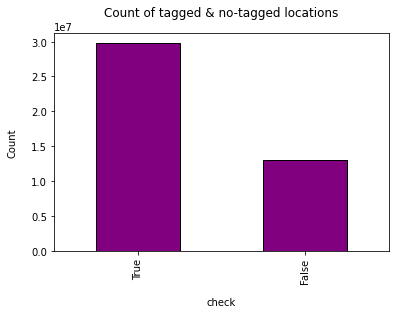

In [112]:
# plot
df_instagram_posts_RQ2_3['check'] = np.where(df_instagram_posts_RQ2_3['location_id'].notna(), True, False)
check = df_instagram_posts_RQ2_3['check']
count = check.value_counts()
count.plot(kind = 'bar', color = 'purple', ec = 'black')
plt.xlabel("check", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of tagged & no-tagged locations", y = 1.05)

As it can be observed in the chart, almost 70% of the locations are tagged by users while 30% aren't. This could be interpreted, in the sense that, **most people post pictures on instagram when they are in a place where they want to be seen**, so it is more likely that the user wants its followers to know the location.

##### 2.5 How many posts include only photos? How many also have videos?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "post_type"]
df_instagram_posts_RQ2_2 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [141]:
# l1: list containing only post_type == 1 (only photos)
l1 = [1]
print("The number of posts that include only photos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l1)].shape[0]) # 41,534,486

The number of posts that include only photos is 41534486


In [143]:
# l1: list containing only post_type == 3 (photos and video)
l2 = [3]
print("The number of posts that include both photos and videos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l2)].shape[0]) # 40,943

The number of posts that include both photos and videos is 40943


##### f) What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

* **Note**: the missing values of the `is_business_account` variable were substituted with `False`. So, the percentages may be different by just eliminating the missing values for that column.

In [138]:
# Percentage of business accounts & non-business accounts

count_business_accounts = df_instagram_profiles.loc[df_instagram_profiles['is_business_account'] == True].shape[0]
percentage_business_accounts = count_business_accounts/len(df_instagram_profiles)

a = "Percentage of business accounts: " + '{0:.2%}'.format(percentage_business_accounts)
b = "Percentage of non-business accounts: " + '{0:.2%}'.format(1 - percentage_business_accounts)

print(os.linesep.join([a, b])) # 18.97%

Percentage of business accounts: 18.97%
Percentage of non-business accounts: 81.03%


This significant difference between the number of business and non-business accounts could be interpreted from a social perspective: even though instagram is one of the most attractive markets for all kind of brands, at its core is mainly used by regular people that want to interact with their friends and make new ones.

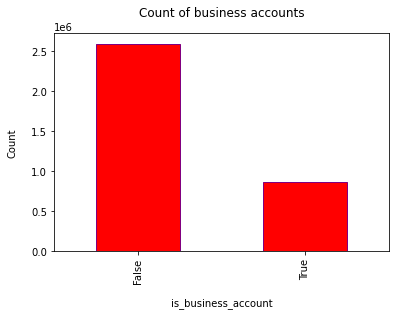

In [77]:
# plot of percentage of business & non-business accounts
bar_binary(df_instagram_profiles['is_business_account'], "is_business_account", "Count of business accounts", "red")

### <b>[RQ3]</b> Now it's important to understand the most common times in which users publish their posts

##### 3.1 What is the most common time in which users publish their posts?

* Let's import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["profile_id", "cts"]
df_instagram_posts_RQ3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [3]:
# For workability reasons, we need to divide dataset into chunks of 5,000,000 rows.
chunk_list = []
for i in range(0, len(df_instagram_posts_RQ3), 5000000):
    chunk = df_instagram_posts_RQ3[i:i+5000000]
    chunk_list.append(chunk)

* Then we convert the `cts` column from object type to `datetime`. Then we create two new columns:
  * `cts_time`: in the format `hh:mm:ss`. For instance, `20:00:00`
  * `hour`: in the format `hh`. For instance, `20`<br>
  Finally we append the chunks to a new list named `chunk_list_new`.

In [4]:
# Convert string (object type) to datetime
# Then, get only time from cts (we are not interested in the dates but only in the time)
chunk_list_new = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.time
    chunk_copy['hour'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new.append(chunk_copy)

* We group by `cts_time` and `hour` by chunks and obtain two new lists `chunk_list_new1` and `chunk_list_new2`.

In [40]:
# Group by cts_time

chunk_list_new1 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('cts_time').size().reset_index(name='counts')
    chunk_list_new1.append(chunk)

In [42]:
# Group by hour

chunk_list_new2 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('hour').size().reset_index(name='counts')
    chunk_list_new2.append(chunk)

* We concatenate the chunks and obtain two dataframes `data` and `data2`.
  * `data` contains `cts_time`.
  * `data2` contains `hour`.

In [43]:
# Concatenate chunks, group by cts_time (and hour) and add up counts

data  = pd.concat(chunk_list_new1).groupby(['cts_time']).sum().reset_index()
data2 = pd.concat(chunk_list_new2).groupby(['hour']).sum().reset_index()
data2.hour = data2.hour.astype(int)

##### The most common time(s) in which users publish their posts is 21:00:09. People post 47.5% more at this time that other times.

In [44]:
count = data.counts.value_counts(ascending = True).values[0]
data.sort_values(by = 'counts', ascending = False).head(count) # 21:00:09

,cts_time,counts
75609,21:00:09,928


In [21]:
print("The average number of times each cts_time is present in the dataset:", int(np.mean(data.counts)))
print("The median  number of times each cts_time is present in the dataset:", int(np.median(data.counts))) 
print("The maximum number of times each cts_time is present in the dataset:", int(np.max(data.counts)))
print("The minimum number of times each cts_time is present in the dataset:", int(np.min(data.counts)))

The average number of times each cts_time is present in the dataset: 487
The median  number of times each cts_time is present in the dataset: 494
The maximum number of times each cts_time is present in the dataset: 928
The minimum number of times each cts_time is present in the dataset: 223


##### The most common hour(s) in which users publish their posts

In [45]:
count2 = data2.counts.value_counts(ascending = True).values[0]
data2.sort_values(by = 'counts', ascending = False).head(count2) # 21:00:09

,hour,counts
19,19,2499758


In [25]:
print("The average number of times each hour is present in the dataset:", int(np.mean(data2.counts)))
print("The median  number of times each hour is present in the dataset:", int(np.median(data2.counts))) 
print("The maximum number of times each hour is present in the dataset:", int(np.max(data2.counts)))
print("The minimum number of times each hour is present in the dataset:", int(np.min(data2.counts)))
print("People post 29% more in the time slot (19:00-19:59) wrt the other time slots")

The average number of times each hour is present in the dataset: 1779452
The median  number of times each hour is present in the dataset: 1779408
The maximum number of times each hour is present in the dataset: 2499758
The minimum number of times each hour is present in the dataset: 1011923
People post 29% more in the time slot (19:00-19:59) wrt the other time slots


##### 3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [18]:
def time_intervals(data, time, time_intervals_list, keyword):
    
    time_results = {}
    for slot in time_intervals_list:
        result = len(data[(time >= slot[0]) &
                                  (time < slot[1])])
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(print("The number of", keyword, "for each given interval"), y = 1.05)
    plt.show() 

##### 3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

In [5]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

In [7]:
# concatenate the chunks

data2 = pd.concat(chunk_list_new)

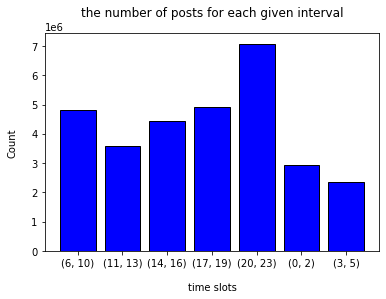

In [19]:
time_intervals(data2, data2.hour, slots, "posts")

### <b>[RQ4]</b> In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

<b>4.1</b> Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [2]:
#Data upload (posts.csv: 42,710.197 rows)
columns_posts = ["post_id","profile_id", "numbr_likes", "number_comments", "cts"]
df_posts_RQ4 = pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = columns_posts , parse_dates=["cts"])

In [3]:
#Data upload (profiles.csv: 4,509.586 rows)
columns_profiles = ["profile_id","following","followers"]
df_profiles_RQ4 = pd.read_csv("instagram_profiles.csv", sep = "\t" , usecols = columns_profiles)

* Due to the multiple exercise requirements that involve combining differents datasets together, we are going to focus our analysis on those profile_id that are present in both posts.csv and profiles.csv. Also, we want to remove all rows containing NaNs:

In [5]:
df_profiles_RQ4 = df_profiles_RQ4[df_profiles_RQ4.profile_id.isin(df_posts_RQ4.profile_id.unique())] #2,207.207
df_posts_RQ4 = df_posts_RQ4[df_posts_RQ4.profile_id.isin(df_profiles_RQ4.profile_id)] #27,715.738 rows
df_posts_RQ4 = df_posts_RQ4.dropna() #25,132.446 rows

* The created function takes as <b>input</b>: the queried profile_id , an array of profile_ids and an array of post_ids. <br> As an <b>output</b>, it returns: a list containing all posts_id of the queried profile_id:

In [9]:
def posts(query_id, profile_id = df_posts_RQ4.profile_id.values , post_id = df_posts_RQ4.post_id.values):
    return post_id[profile_id == query_id]

<b>4.2</b> Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function. <br>

* Before defining the function, we leverage <i>np.unique</i> method to create an array with <b>all unique profile_ids</b> that appear in <b>posts.csv</b> and another one containing their <b>frequency of appareance</b>. Then, we create a <b> sorted dataframe by posting frequency</b>.

In [74]:
unique_ids ,number_of_posts = np.unique(df_posts_RQ4.profile_id.values, return_counts=True)
post_per_profile = pd.DataFrame({'profile_id': unique_ids, 'number_of_posts': number_of_posts})
sorted_posters = post_per_profile.sort_values(by = 'number_of_posts' , ascending = False)
sorted_posters.head(10)

,profile_id,number_of_posts
1588423,5.421037e+09,599
2165315,1.287812e+10,586
2172742,1.347814e+10,557
2165889,1.296135e+10,526
1603569,5.515448e+09,450
1222351,2.243212e+09,450
1525258,4.575459e+09,384
74789,1.029414e+07,362
514565,2.682094e+08,357
160715,2.365051e+07,345


* This function takes as an <b>input</b>: an integer <i>n</i> , which specifies the queried <b>top n most frequent posters</b>, and the <b>sorted array</b> of profile_ids <b>by their number of posts made</b>. It returns as an <b>output</b> a list of arrays containing the post_id of the top n more frequent posters (as we use the previously coded </i>posts()</i> function).

In [54]:
def top_n_post(n,data = sorted_posters.profile_id.values):
    return [posts(i) for i in data[0:n]] 

<b>4.3</b> What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?<br>

* We first create a new dataframe by merging the top 10 ids with their associated data in profiles.csv, but we remove <i>post_id</i> and <i>cts</i> columns as they are not needed now.

In [39]:
profile_ids_likes_comments = pd.merge(sorted_posters[["profile_id"]].head(10), df_posts_RQ4df_posts_RQ4, on= 'profile_id')
profile_ids_likes_comments.drop(['post_id', 'cts'], axis=1 , inplace = True)

* Then, we group this new dataframe by <i>profile_id</i> and aggregate the mean values of both comments and likes for each user. Then we compute the overall mean over both columns in a call to print.

In [68]:
top_average_likes_comments = profile_ids_likes_comments.groupby("profile_id").aggregate("mean")
print("The average number of likes of the top 10 profiles with the highest number of posts is", 
round(top_average_likes_comments.numbr_likes.mean(),2), "likes, and their average number of comments is",
round(top_average_likes_comments.number_comments.mean(),2),". The dataframe below shows their individual average data:")
top_average_likes_comments

The average number of likes of the top 10 profiles with the highest number of posts is 600.1 likes, and their average number of comments is 16.63 . The dataframe below shows their individual average data:


,numbr_likes,number_comments
profile_id,,
1.029414e+07,3138.977901,111.060773
2.365051e+07,247.023188,7.959420
2.682094e+08,1931.731092,31.114846
2.243212e+09,636.502222,15.488889
4.575459e+09,19.434896,0.018229
5.421037e+09,10.373957,0.263773
5.515448e+09,8.173333,0.073333
1.287812e+10,2.174061,0.114334
1.296135e+10,3.091255,0.098859


<b>4.4</b> Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

* We first add an <i>hour</i> column to the posts.csv based on the <i>cts</i> column.
* Then we create a new data set that includes only the top 10 highest posters and their hours of posting.

In [88]:
warnings.filterwarnings("ignore")
df_posts_RQ4["hour"] = pd.DatetimeIndex(df_posts_RQ4['cts']).hour
times_top_users = df_posts_RQ4[df_posts_RQ4.profile_id.isin(top_average_likes_comments.index)]
times_top_users.drop(['post_id', 'cts','numbr_likes','number_comments'], axis=1 , inplace = True)
times_top_users

,profile_id,hour
7436,4.575459e+09,9
28906,2.243212e+09,13
40126,1.029414e+07,22
40171,1.029414e+07,22
40603,2.682094e+08,21
...,...,...
42638925,5.515448e+09,7
42653456,2.243212e+09,15
42658112,1.296135e+10,10
42669635,2.365051e+07,14


* Finally, we leverage the function created in RQ.3 for plotting the posting times of the 10 top users.
* As we can observe in the chart, it is clear that the slot with the highest amount of posts is between 20h and 23h, which intuitevely makes sense, as within these hours people are usually not at work or school anymore, but rather enjoying their free time. On the counterpart, the intervals with less posts are between 0h and 5h, which obviously is when people are already sleeping. 

The total number of posts of the top 10 "posters"  for each given interval


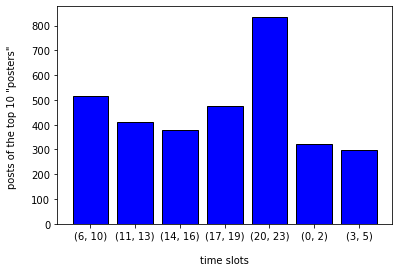

In [95]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]
time_intervals(times_top_users, times_top_users.hour, slots , """posts of the top 10 "posters" """)

### <b>[RQ5]</b> The most influential users are the ones with the highest number of “followers", you can now look more into their activity.


<b>5.1</b> Plot the top 10 most popular users in terms of followers and their number of posts.


In [35]:
# posts dataset
fields=['profile_id','location_id','post_type','numbr_likes','number_comments']
df_instagram_posts_RQ5=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)

In [36]:
#profiles dataset
df_instagram_profiles_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_profiles.zip', delimiter='\t')

In [37]:
#locations dataset
df_instagram_locations_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_locations.zip', delimiter='\t')

* We start by extracting the top 10 most followed accounts

In [38]:
followers=df_instagram_profiles_RQ5['followers']
followers.nlargest(10)

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

* We show the dataset of the top 10 most influential users

In [39]:
#top10 profiles by followers
top10=df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers >= 26252169.0]
top10.sort_values(['followers'],ascending=False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


* We now create a barplot showing the number of followers for each one of the most influential users

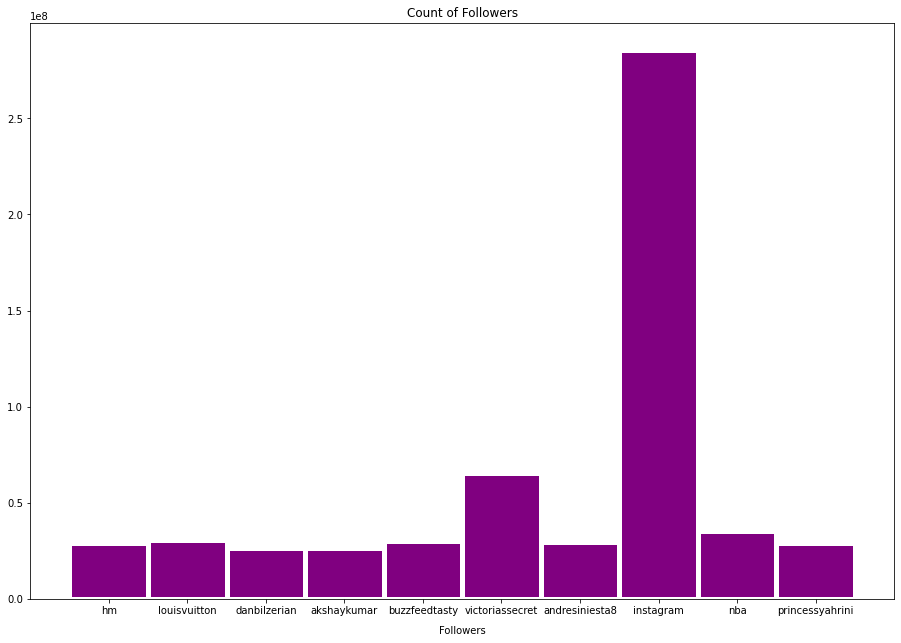

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
profiles = list(top10['profile_name'])
nfollows = list(top10['followers'])
ax.bar(profiles,nfollows,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('Followers',labelpad=10)
plt.ylabel('',labelpad=10)
plt.title('Count of Followers')
plt.show()

<b>5.2</b> Who is the most influential user?


In [42]:
#most influential user
df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers == 285457645.0] 

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False


* The most influential user is <b>Instagram


<b>5.3</b> Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

* We create a dataframe containing all the posts by the top 10 most influential users

In [44]:
top10_posts=pd.DataFrame(columns=['profile_id'])
for i in [23410080.0,187619120.0,50417061.0,907025384.0,2125506698.0,3416684.0,496865116.0,25025320.0,20824486.0,24239929.0]:
    x=df_instagram_posts_RQ5[df_instagram_posts_RQ5['profile_id']==int(i)]
    top10_posts=pd.merge(top10_posts,x,how='outer')
print(top10_posts)

      profile_id   location_id  post_type  numbr_likes  number_comments
0     23410080.0  3.846191e+08          1     116059.0            642.0
1     23410080.0  2.293029e+08          1      46368.0             88.0
2    187619120.0  5.590714e+06          1     186857.0            867.0
3     50417061.0  2.222444e+08          1     266200.0           3290.0
4     50417061.0  2.368281e+08          1     268732.0           6402.0
..           ...           ...        ...          ...              ...
136   24239929.0  2.130118e+08          1      55010.0              0.0
137   24239929.0  2.130118e+08          1     114315.0              0.0
138   24239929.0  2.130118e+08          1      78974.0              0.0
139   24239929.0  1.906910e+15          1     132116.0              0.0
140   24239929.0  1.906910e+15          1      66185.0              0.0

[141 rows x 5 columns]


* We extract the location_id of each post by top10_posts, then we create a list containing the output.
* We then procede to create top10_loc, a dataframe containing all the locations tagged by the top10 users

In [46]:
loc_id= top10_posts['location_id']
loc_id.apply(lambda x: format(x, 'f'))

0             384619115.000000
1             229302869.000000
2               5590714.000000
3             222244450.000000
4             236828105.000000
                ...           
136           213011753.000000
137           213011753.000000
138           213011753.000000
139    1906910439594849.000000
140    1906910439594849.000000
Name: location_id, Length: 141, dtype: object

In [51]:
cc=[i for i in loc_id]
top10_loc=pd.DataFrame(columns=['sid','name','city'])


#dataframe containing all the locations tagged by the top10 users

for i in range(len(df_instagram_locations_RQ5)):
    if df_instagram_locations_RQ5['id'][i] in cc:
        x=df_instagram_locations_RQ5[df_instagram_locations_RQ5.id == df_instagram_locations_RQ5['id'][i]]
        top10_loc=pd.merge(top10_loc,x,how='outer')

* We now print the locations visited by the top 10 accounts and we group them by city, then we count how many times wach city was visited.

In [52]:
top10_loc_groups=top10_loc.groupby(['city'])['city'].count()

In [53]:
top10_loc_groups

city
Adelaide, South Australia    1
Akron, Ohio                  1
Amphoe Pak Chong             1
Amsterdam, Netherlands       3
Bad Urach                    1
                            ..
Vail, Colorado               1
Vaitape, French Polynesia    1
Valencia                     1
Valley Park, Missouri        1
Xiandu, Zhejiang, China      1
Name: city, Length: 63, dtype: int64

* In the following plot we can observe the number of times each city has been tagged by one of the top 10 most influential users of Instagram;
Only the cities visited more than one time are plotted.

In [52]:
freq=list(acg)
dd=[]
for i in freq:
    if i != 1:
        dd.append(i)
city=['Amsterdam, Netherlands','Houston, Texas','Las Vegas, Nevada','London, United Kingdom','Los Angeles, California ','New York, New York','Shanghai, China','Singapore']

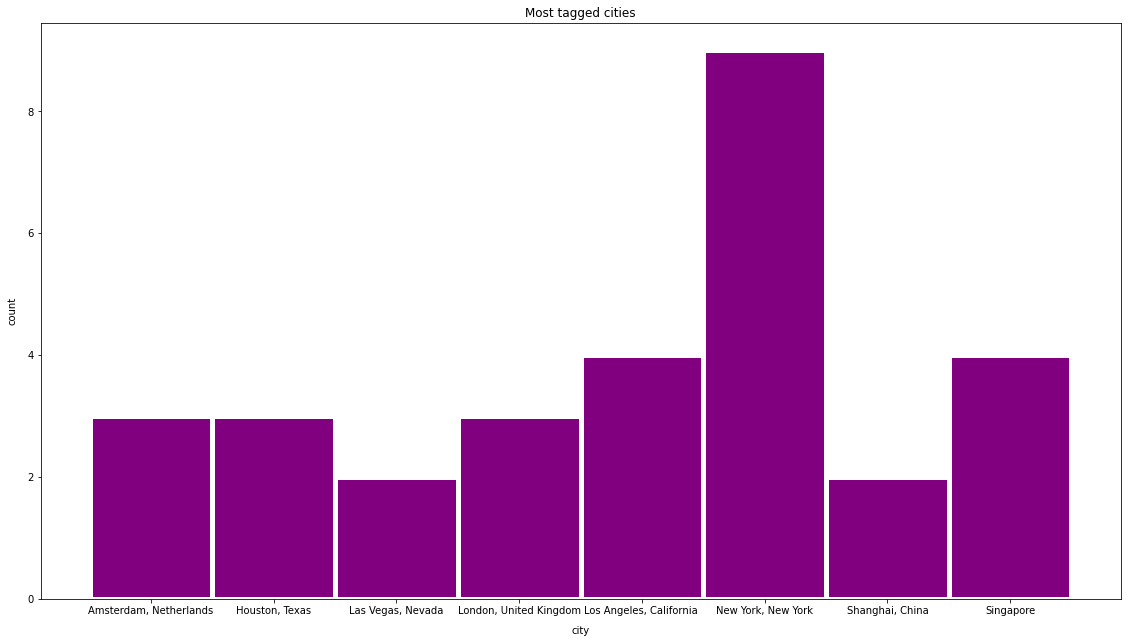

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
ax.bar(city,dd,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('city',labelpad=10)
plt.ylabel('count',labelpad=10)
plt.title('Most tagged cities')
plt.show()

* The most tagged location by top 10 most influential users is <b>New York</b>, which has been visited 9 times, followed by Los Angeles and Singapore with 4 visits, then Amsterdam,
Houston and London 3 times, and finally Las Vegas and Shangai 2 times.

All the other cities have been visited only once

<b>5.4.1</b> How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents?

* After applying the 'groupby' function to the dataframe containing the most influential users, we notice that we have 141 posts made by them in our posts dataset; 
* Of these posts, <b>128 are pictures-only posts</b>, and <b>13 are reel</b> and <b>0 are with both content</b>.

In [53]:
top10_posts.groupby(['profile_id','post_type'])["numbr_likes"].count()
ptype=top10_posts.groupby(['post_type'])["numbr_likes"].count()
ptype

post_type
1    128
2     13
Name: numbr_likes, dtype: int64

<b>5.4.2</b> Provide the number as percentages and interpret those figures.

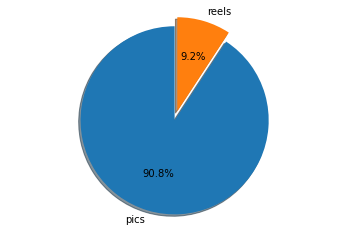

In [54]:
pic=128/141
reel=13/141
pic*100,reel*100

labels = 'pics', 'reels'
sizes = [128,13]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* After observing the plot, we can say that pictures-only posts are the vast majority of the total, being <b>90.8%</b>, and reels appear approximately once every 10 posts (<b>9.2%)

<b>5.5</b> How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

* We start by analizing the posts made by the top 10 most influencial users.
* When they post a picture, they get on average 541294 likes and 3883 comments, while when they post reels <b>they get on average 266.524.1 likes and 2.019.8 comments</b>.
Since we don't have data regarding their mixed posts, we can't say what is the average number of likes and comments for those types of posts.

In [57]:
top10_posts.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    541294.015625
2    266524.153846
Name: numbr_likes, dtype: float64

In [56]:
top10_posts.groupby(['post_type'])["number_comments"].mean()

post_type
1    3882.914062
2    2019.846154
Name: number_comments, dtype: float64

* On the other hand, if we analize all the users, with any number of followers, we obviously get smaller outputs for average likes and comments. 
* The average number of likes <b>for a picture-only post</b>, considering all the posts we can analize, is <b>280.6, while for comments is 390.8 </b>.
* <b>For reels, the average likes and comments are 390.8 and 11.2 respectively</b>.
* We can now dispose also of <b>the mixed posts data</b>, and we observe that they receive <b>an average of 194.7 likes and 6.7 comments</b>.
* The biggest difference between the most influential users and all the users, is that they receive more likes and comments on average on only_pictures post, while regular users receive more likes and comments on average on the reels.

In [59]:
df_instagram_posts_RQ5.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    280.659566
2    390.781299
3    194.758812
Name: numbr_likes, dtype: float64

In [58]:
df_instagram_posts_RQ5.groupby(['post_type'])["number_comments"].mean()

post_type
1     7.498260
2    11.179689
3     6.701434
Name: number_comments, dtype: float64

### [RQ6] It's time to get information from the user posting effectiveness.

<b>6.1.1</b> What is the average time (days and minutes) a user lets pass before publishing another post?

* We grouped the data by "profile_id" and also add three new columns: cts max, cts min, and cts count per user. Then, we remove those users who only posted one post, as they are not relevant for our analysis (140.762 users). Finally, we create a new column called mean_time that has the average time between posts for each user.

In [100]:
data_grouped = df_posts_RQ4.groupby("profile_id").aggregate({'cts':["max", "min", "count"]})
data_grouped =  data_grouped[data_grouped.cts["count"] > 1]
data_grouped["average_time_between_posts"] = (data_grouped.cts['max'] - data_grouped.cts['min']) / (data_grouped.cts['count']-1)
data_grouped

cts                            \
                             max                 min count   
profile_id                                                   
4.000000e+00 2019-05-05 08:03:36 2010-07-22 12:19:51    37   
1.900000e+01 2019-04-17 07:44:13 2010-10-23 18:48:33    51   
2.800000e+01 2019-04-16 05:10:12 2011-02-19 20:16:29    92   
3.300000e+01 2013-03-30 22:35:38 2011-04-30 06:13:46     2   
3.400000e+01 2019-07-01 20:49:50 2011-07-29 06:24:16    20   
...                          ...                 ...   ...   
1.499738e+10 2019-07-11 04:25:20 2019-07-09 03:18:33    12   
1.501918e+10 2019-07-21 14:05:34 2019-06-19 13:17:00     5   
1.523330e+10 2019-06-27 00:11:09 2019-06-26 23:56:47     3   
1.566695e+10 2019-08-06 01:01:31 2019-07-29 21:36:32    11   
9.001013e+13 2018-04-04 09:53:28 2017-06-22 10:56:54    10   

              average_time_between_posts  
                                          
profile_id                                
4.000000e+00  89 days 03:12:52.916666666  
1.900000e+01     61 days 22:49:06.800000  
2.800000e+01  32 days 17:14:26.186813186  
3.300000e+01           700 days 16:21:52  
3.400000e+01 152 days 08:20:17.578947368  
...                                  ...  
1.499738e+10   0 days 04:27:53.363636363  
1.501918e+10      8 days 00:12:08.500000  
1.523330e+10             0 days 00:07:11  
1.566695e+10      0 days 17:08:29.900000  
9.001013e+13  31 days 18:32:57.111111111  

[2033081 rows x 4 columns]

* Then we compute the mean over the <i>average_time_between_posts</i> column
* The average time between posts varies depending on which users we consider for the analysis. 
If we consider all ids from the posts.csv we obtain a mean of 76 days 17 hours and 06 minutes.
While if we compute the mean only for those profile_ids who appear in both datasets, the mean is of 30 days 02 hours and 07 minutes.

In [101]:
average_time_between_posts = data_grouped["average_time_between_posts"].mean()
print("The average time between posts per user is" , str(average_time_between_posts)[0:7],str(average_time_between_posts)[8:10],"hours and",str(average_time_between_posts)[11:13],"minutes.")

The average time between posts per user is 30 days 02 hours and 07 minutes.


<b>6.1.2</b> Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

* By merging the data obtained in 6.1.1 with profiles.csv, we obtain a new dataframe in which we have all the relevant information to our plot (average time between posts, followers and followings), which  we sort (by ascending average_time_between_posts). Also, we remove those rows who have Nan values in their followers and followings(73.531 rows), as we would not be able to plot them as it is required by the exercise.

In [114]:
warnings.filterwarnings("ignore")
average_times = data_grouped.iloc[: , [2,3]]
mean_times_followings_followers = pd.merge(average_times, df_profiles_RQ4, on='profile_id')
mean_times_followings_followers.rename(columns=''.join, inplace=True)
mean_times_followings_followers = mean_times_followings_followers.dropna()
mean_times_followings_followers.sort_values(by = 'average_time_between_posts' , ascending = True).head(9150)

,profile_id,ctscount,average_time_between_posts,following,followers
1039291,1.823732e+09,2,0 days 00:00:00,1009.0,30.0
1951819,1.036093e+10,2,0 days 00:00:00,5115.0,149.0
59496,8.801686e+06,2,0 days 00:00:00,1572.0,705.0
1617198,6.324740e+09,2,0 days 00:00:00,1377.0,288.0
1900802,9.197905e+09,2,0 days 00:00:00,30.0,37.0
...,...,...,...,...,...
1903288,9.224064e+09,12,0 days 00:01:00.454545454,816.0,50.0
1245612,3.141811e+09,12,0 days 00:01:00.454545454,832.0,92.0
1834052,8.542995e+09,7,0 days 00:01:00.500000,160.0,112.0
1772639,8.028836e+09,3,0 days 00:01:00.500000,1196.0,272.0


* Then, we extract the top 3 users by less average_time_between_posts, with their respective followings and followers.

In [108]:
top_3_most_freq = mean_times_followings_followers.sort_values(by = 'average_time_between_posts' , ascending = True).head(3)
top_3_most_freq.average_time_between_posts = pd.to_numeric(top_3_most_freq.average_time_between_posts)
top_3_most_freq

,profile_id,ctscount,average_time_between_posts,following,followers
1039291,1.823732e+09,2,0,1009.0,30.0
1951819,1.036093e+10,2,0,5115.0,149.0
59496,8.801686e+06,2,0,1572.0,705.0


* The top 3 most-frequent posters have an </b>average time between posts</b> of <b>0</b>. This means that they have posted all their posts at the same time, which intuitevely makes no sense. As a matter of fact, up to the 9150 most-frequent posters have an average time between posts of <b>less than a minute</b>, and from there, we can observe in the sorted data a progressive and very <b>smooth increase in the average time</b>. Therefore, as there are not "sudden" shifts in the average time right after those users with 0 time, we can't just ommit those profiles for the analysis and "jump" to the next ones.
* Moreover, as both the followings and the followers don't follow any clear pattern of behaviour among the three users, we conclude that <b>we can't obtain any insighful information from this chart</b>.

<AxesSubplot:xlabel='average_time_between_posts', ylabel='followers'>

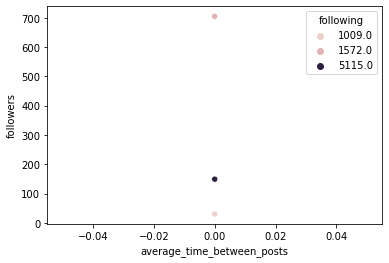

In [109]:
sns.scatterplot(data = top_3_most_freq , x="average_time_between_posts" , y= "followers", hue = "following",legend = "full")

<b>6.2</b> Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

* In order to obtain the average likes and comments, we can use the previously coded function, but adjusting the operation performed over each time interval, in this case we need the mean() instead of the len().

In [127]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

def time_intervals_avg(data, time, time_intervals_list, keyword):
    
    time_results = {}
    for slot in time_intervals_list:
        result = (data[(time >= slot[0]) & (time < slot[1])]).mean() #there is a mean instead of a count
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel(keyword, labelpad = 14)
    plt.title(print("The total number of", keyword, "for each given interval"), y = 1.05)
    plt.show() 

* We can observe similar outputs in both average likes and comments barplots, and also not big differences among the time intervals, in both cases. 
* As shown in both barplots, from 17h to 19h is when people interact more with other users. We interpret that at these time interval, most people are conducting their <b>last hours of their working or studying obligations</b>, therefore they are <b>more inclined to check social media and interact with other users</b>. This can be related with our extracted insights from RQ4.4: from 20-23 users posts the mosts, because <b>most users are already enjoying their free time</b> and <b>have the time to post</b>, which usually takes more time than just interacting (liking and commenting other users' posts).

The total number of likes for each given interval


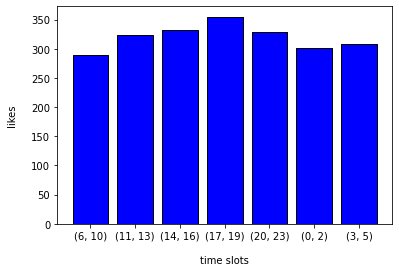

The total number of comments for each given interval


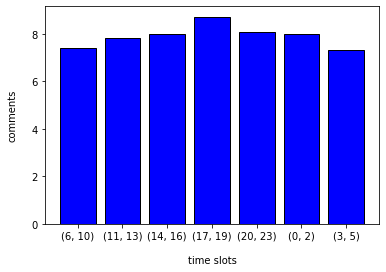

In [129]:
time_intervals_avg(df_posts_RQ4.numbr_likes.values, df_posts_RQ4.hour, slots , "likes")
time_intervals_avg(df_posts_RQ4.number_comments, df_posts_RQ4.hour, slots, "comments")

### <b>[RQ7]</b> Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

<b>7.1</b> What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

* We create two datasets from the starting ones, one containing the profile ids and number of likes of each post
and the second one ("folid") containing the profile ids and number of followers of each profile.
* We delete the lines that have missing values in followers and number of likes 

In [6]:
# posts dataset
fields=['profile_id','numbr_likes']
df_instagram_posts_RQ7=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)
df_instagram_posts_RQ7.dropna(subset=['numbr_likes'], inplace=True)

In [12]:
df_instagram_profiles_RQ7=df_instagram_profiles_RQ5.copy()
folid=df_instagram_profiles_RQ7[['followers','profile_id']]
folid.dropna(subset=['followers'], inplace=True)

* We extract those profile_id that are present in both posts dataset and profiles dataset:

In [42]:
dp = df_instagram_profiles_RQ7[df_instagram_profiles_RQ7.profile_id.isin(dpost.profile_id.unique())] #2,207.207
df_instagram_posts_RQ7 = df_instagram_posts_RQ7[df_instagram_posts_RQ7.profile_id.isin(dp.profile_id)] #27,715.738 rows
df_instagram_posts_RQ7 = df_instagram_posts_RQ7.dropna() #25,132.446 rows

* We create a single dataset containing all profiles id with number of likes and followers:

In [28]:
followers_likes_RQ7=pd.merge(dpost,folid, on='profile_id') #24,708.644 rows

* Now, through a "mask" we extract only those values that satisfy our condition, that the number of likes of a post are more than 20% of the profile's follower number:

In [35]:
best_followers_likes_RQ7=followers_likes_RQ7[followers_likes_RQ7.numbr_likes>(followers_likes_RQ7.followers/5)]
best_followers_likes_RQ7 #3,883.291 rows

,profile_id,numbr_likes,followers
24,2.237948e+09,253.0,1204.0
54,6.027751e+09,46.0,164.0
55,6.027751e+09,33.0,164.0
56,6.027751e+09,33.0,164.0
57,6.027751e+09,51.0,164.0
...,...,...,...
24708503,2.297958e+09,407.0,1068.0
24708518,5.562025e+09,21.0,96.0
24708522,1.171138e+10,2103.0,13.0
24708628,3.723950e+09,117.0,377.0


In [32]:
len(best_followers_likes_RQ7)/len(followers_likes_RQ7)

0.15716325833178058

* After dividing the number of posts that satisfies our condition to the total number of posts considered, <b>we obtain a probability of 15.7%</b> that a post receives more than 20% "likes" of the number of followers a user has

<b>7.2</b> Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

* We start by grouping by the post dataset by each profile_id and then by location_id, obtaining how many times each user had been to each location.

In [40]:
pl=dpost.groupby(['profile_id','location_id'])['location_id'].count()
pl

profile_id    location_id 
3.000000e+00  1.000000e+01    1
              5.400000e+01    1
              8.030000e+02    1
              1.526200e+04    1
              2.705200e+04    1
                             ..
9.001013e+13  6.631216e+14    1
              2.075964e+14    1
              1.855425e+14    2
              2.418404e+08    1
9.001014e+13  1.077310e+06    1
Name: location_id, Length: 21096135, dtype: int64

* We count then how many times users have been only once to a location;

In [41]:
pl.value_counts()

1      18134031
2       1662813
3        538694
4        237039
5        136753
         ...   
125           1
214           1
72            1
270           1
124           1
Name: location_id, Length: 106, dtype: int64

The output above shows how many times users visited a location 1,2,3.. ecc. times

* By dividing the places visited only once bt each single user by the total number of locations visited we obtain the probability that a user visits once a location, and subtracting that probability from 1 we obtain the final probability of <b>14%</b> that a user returns to a site after having posted it in the past. 

In [23]:
1-18134031/21096135

0.1404097954435729

* From our point of view, this is a probability that makes sense, because we assume that users want to have profiles <b>rich of different contents</b>, to give other people the idea of having an interesting lifestyle, according to the tendency that people have on social media of "showing-off". That's a possible hypothesis, in our opinion, about <b>why only 14% of the times people post again in the same location.

### <b>[RQ8]</b> Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

<b>8.1</b> Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In order to provide evidence for <b>causality</b> (i.e. "more likes mean more comments"), it is <b>not enough to show the correlation between variables</b>.

* However, <b>in order to exist causation, there needs to exist correlation</b>. By looking at he data, we can observe that the correlation between `numbr_likes` and `number_comments`, is approximately equal to `37.5%`. Initially, we might have been inclined to predict some positive relationship between the two variables, however the data shows that <b>their correlation is actually quite weak.

In [6]:
# dataset containing the instagram_posts's numbr_likes and number_comments columns
df_instagram_posts_RQ8_1 = df_instagram_posts_RQ2_1 #42,710.161 rows
print(df_instagram_posts_RQ8_1.corr())

                 numbr_likes  number_comments
numbr_likes         1.000000         0.374453
number_comments     0.374453         1.000000


* Below you can find a scatterplot of the first 1,000,000 observations (we show a reduced sample for computational reasons) of the `df_instagram_posts_RQ8_1` dataframe. Unfortunately, our data is full of outliers that squash the plot to the bottom-left rendering it difficult to interpret the results and study the relationship between `numbr_likes` and `number_comments`.

Text(0.5, 1.05, 'Scatterplot of number of likes against number of comments')

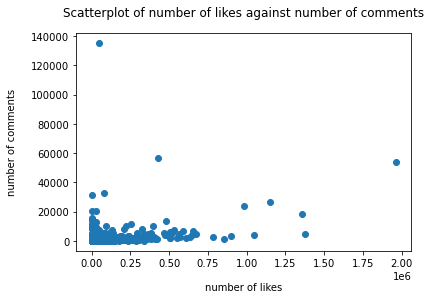

In [38]:
sample_RQ8 = df_instagram_posts_RQ8_1.head(1000000)
plt.scatter(sample_RQ8['numbr_likes'], sample_RQ8['number_comments'])
plt.xlabel("number of likes", labelpad = 14)
plt.ylabel("number of comments", labelpad = 14)
plt.title("Scatterplot of number of likes against number of comments", y = 1.05)
#The plot is squashed by the outliers

As it can be seen from the boxplots and the summary statistics previously done in the EDA of `numbr_likes` and `number_comments`, the data is **strongly** skewed and contains a lot of outliers. The summary statistics clearly show the presence of outliers as we have already discussed in RQ1. We conclude that, based on the data, <b>we can't assert that more likes means more comments.

<b>8.2</b> Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice

* We work in chunks for both dataframes `df_instagram_posts_RQ8_1` and `df_instagram_posts_RQ8_2` for computational reasons.
* Then we concatenate the columns by chunks and append the chunks to a new list called `chunk_list_RQ8_3`.
* We concatenate the chunks in `chunk_list_RQ8_3` and group by the column `hour` aggregating on the mean of `numbr_likes` and `number_comments`. We obtain a new dataframe called `df_instagram_posts_RQ8_grouped` which shows the average likes and commets for each time interval.

In [11]:
# dataset containing the instagram_posts's 
df_instagram_posts_RQ8_2 = pd.concat(chunk_list_new)[['hour']]

In [13]:
chunk_list_RQ8_1 = []
for i in range(0, len(df_instagram_posts_RQ8_1), 5000000):
    chunk = df_instagram_posts_RQ8_1[i:i+5000000]
    chunk_list_RQ8_1.append(chunk)

chunk_list_RQ8_2 = []
for i in range(0, len(df_instagram_posts_RQ8_2),b 5000000):
    chunk = df_instagram_posts_RQ8_2[i:i+5000000]
    chunk_list_RQ8_2.append(chunk)

chunk_list_RQ8_3 = []
for i in range(0, len(df_instagram_posts_RQ8_2), 5000000):
    chunk = pd.concat([df_instagram_posts_RQ8_2[i:i+5000000], df_instagram_posts_RQ8_1[i:i+5000000]], axis = 1)
    chunk_list_RQ8_3.append(chunk)

In [25]:
df_instagram_posts_RQ8_grouped = pd.concat(chunk_list_RQ8_3).groupby('hour', as_index=False).mean()
df_instagram_posts_RQ8_grouped.hour = df_instagram_posts_RQ8_grouped.hour.astype(int)
df_instagram_posts_RQ8_grouped

,hour,numbr_likes,number_comments
0,0,262.135037,7.384589
1,1,266.617649,7.683354
2,2,278.816228,7.772853
3,3,271.618603,7.325271
4,4,263.379649,6.930650
5,5,261.192717,6.683866
6,6,253.587895,6.723536
7,7,262.929015,7.026733
8,8,264.922111,7.710607
9,9,269.073676,7.393673


Susprisingly if we plot the likes and comments for each time interval, we can observe how highly correlated (80%) this variables become. Meaning that, as we previously mentioned, <b>likes and comments are not correlated on a "post" basis, but rather on a time interval basis</b>. For example the likes and comments obtained overall between 7 and 8pm, are correlated with the likes and comments obtained between 8 and 9 and so on.

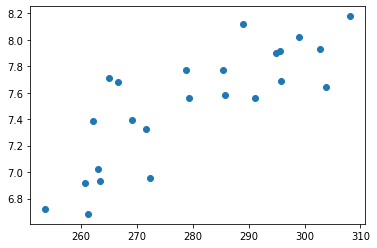

In [5]:
plt.scatter(df_instagram_posts_RQ8_grouped["numbr_likes"],df_instagram_posts_RQ8_grouped["number_comments"])

#### `1st statistics: correlation`

In [21]:
# Let's look at the correlation between the three variables

print(df_instagram_posts_RQ8_grouped.corr())

                     hour  numbr_likes  number_comments
hour             1.000000     0.514339         0.279257
numbr_likes      0.514339     1.000000         0.804829
number_comments  0.279257     0.804829         1.000000


##### `Correlation results comments`

* `hour` and `numbr_likes` have a moderate positive correlation (**51.4%**)
* `hour` and `number_comments` have a weak positive correlation (**27.9%**)

The time in which you post is more correlated to the number of likes wrt the number of comments a post gets.<br>
We can also see that the number of likes and the number of comments are strongly correlated.

#### `2nd statistics: linear regression (p-value)`

* The `p-value` for each term tests the null hypothesis H₀ that the coefficient is equal to zero. So, if the p-value is less than a specified `significance level α` (usually 0.05), we can reject the null hypothesis H₀. For small p-values we can state that the predictor variable does give a meaningul addition to the model: **the values of the predictor variable are related to the values of the response variable**.

In [22]:
# Simple linear regression
# time ~ number_likes
# time ~ number_comments

number_likes = df_instagram_posts_RQ8_grouped.numbr_likes
number_comments = df_instagram_posts_RQ8_grouped.number_comments
time = df_instagram_posts_RQ8_grouped.hour

result = scipy.stats.linregress(number_likes, time)
result2 = scipy.stats.linregress(number_comments, time)

In [23]:
print("The p-value for model 1 is:", result.pvalue)
print("the p-value for model 2 is:", result2.pvalue) # p-value == 0.0 implying that number_comments is statistically significant in predicting number_likes and viceversa 

# the number of likes is significant while the number of comments is not

The p-value for model 1 is: 0.010129899606811663
the p-value for model 2 is: 0.18633045092180706


##### Conclusion (`Linear Regression comments`)

According to the **`p-value`** for the two models, there seems to be a <b>significant relationship between the time a user posts and the number of likes the post gets</b>. In fact, the `p-value = 0.01 < 0.05`. On the contrary, <b>there is no significant relationship between the time a user posts and the number of comments</b> as the `p-value = 0.19 > 0.05`. We can also point out that the correlation between `hour` and `numbr_likes` is approximately twice as big as the correlation between `hour` and `number_comments`.

<b>8.3</b> What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

* We start by plotting the empirical distribution of the followers; we immediatly notice that the distribution is asymmetrical to the right and it resembles an exponential distribution

Text(0.5, 1.0, 'count of followers')

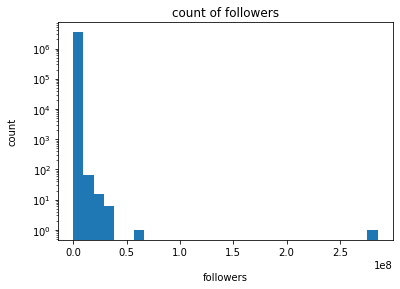

In [32]:
followers.plot(kind='hist',bins=30,logy=True)
plt.xlabel('followers',labelpad=15)
plt.ylabel('count',labelpad=15)
plt.title('count of followers')

* We continue the analysis with a summary of the main characteristics of the distribution. From the table below we can observe that the mean of the followers distribution is 4739.899180, a value that is way closer to the minimun of the distribution (0), than the maximum (285457645), and it's way bigger than the median of the distribution which equals to 406: this indicates as well that the distribution is asymmetrial and that there might be are some big outliers that influence the value of the mean. The first quantile is equal to 159 and the third equals 974, having an inter-quantile range of 815. From the boxplot below we can easily notice the maximum, being a huge outlier. 

<AxesSubplot:>

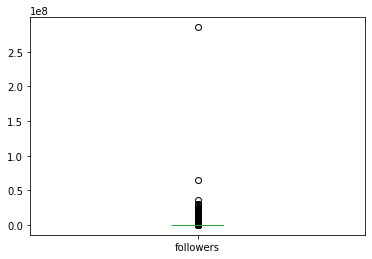

In [34]:
followers.plot(kind='box')

In [10]:
followers.describe().apply(lambda x: format(x, 'f'))

count      3452771.000000
mean          4739.899180
std         193908.709487
min              0.000000
25%            159.000000
50%            406.000000
75%            974.000000
max      285457645.000000
Name: followers, dtype: object

<b>8.4</b> What are histograms, bar plots, scatterplots and pie charts used for?

* An histogram is a graphical representation of a distribution of continuos numerical datas divided in classes, named bins, that can be of different dimentions. It's used to have a graphic representation of the frequency of each class compared to the others.
* The barplot, differently from the histogram, is used to plot cathegorical vriables, and it's used to visualize and compare the frequency of the analyzed phenomenon.
* The scatterplot is a plot that uses cartesian coordinates and it is used to visualize the value of two variables for a set of data. Each value is represented as a dot.
* The pie chart is a graph used to describe numerical proportion of a variable, similarly to the barplot but with a circular form.

<b>8.5</b> What insights can you extract from a Box Plot?

* The box plot is a graph that is used to show the quartiles, max, min, the range, the inter-quantile range, the skeweness and spread of numerical datas. It is also useful to locate outliers that are plotted as dots.

## Bonus Points

##### a) Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [3]:
#Data upload (posts.csv: 42,710.197 rows)
columns_posts = ["profile_id","cts"]
data_posts= pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = columns_posts , parse_dates=["cts"])

In [2]:
#Data upload (profiles.csv: 4,509.586 rows)
columns_profiles = ["profile_id","followers"]
data_profiles = pd.read_csv("instagram_profiles.csv", sep = "\t" , usecols = columns_profiles)

1. In profiles.csv, we remove those rows that have missing values in "followers" and then we sort the data in ascending order by followers. 

In [19]:
data_profiles = data_profiles.dropna()
sorted_profiles = data_profiles.sort_values(by = "followers",ascending = False)

,profile_id,followers
3045705,1.524120e+07,2505.0
1793602,1.485528e+09,2505.0
2635421,2.087735e+08,2505.0
345129,1.237176e+09,2504.0
334101,6.864995e+09,2504.0
...,...,...
2125632,5.001772e+09,0.0
3435370,5.477267e+09,0.0
1323180,1.010826e+09,0.0
1902380,4.205987e+09,0.0


2. We create 2 new dataframes: one containing the top 10 percent of the sorted dataframe and the second with the remainig 90%.

In [ ]:
sorted_profiles_1 = sorted_profiles[0:int(len(sorted_profiles)*0.1+1)]
sorted_profiles_2 = sorted_profiles[int(len(sorted_profiles)*0.1+1):]

3. We <b>merge independently both datasets with posts.csv by profile_id</b>. As an output we have 2 new dataframes:
the first one contains all posts of the top_10 and the other contains all posts of the bottom 90 users (based on followers).

In [37]:
top_10_followers = pd.merge(sorted_profiles_1, data_posts, on='profile_id')
bottom_90_follow = pd.merge(sorted_profiles_2, data_posts, on='profile_id')
top_10_followers

,profile_id,followers,cts
0,2.502532e+07,285457645.0,2012-12-01 17:42:03
1,2.502532e+07,285457645.0,2018-01-17 20:59:30
2,2.502532e+07,285457645.0,2018-12-20 03:03:13
3,2.502532e+07,285457645.0,2017-09-19 03:56:12
4,2.502532e+07,285457645.0,2014-10-29 14:21:30
...,...,...,...
3981521,7.186242e+09,2505.0,2019-08-13 08:39:16
3981522,7.186242e+09,2505.0,2019-08-13 08:36:35
3981523,7.186242e+09,2505.0,2019-08-13 08:34:27
3981524,7.186242e+09,2505.0,2019-08-09 12:01:49


4. We <b>group by profile_id</b> both datasets and <b>aggregate a new column containing the average time bettwen post per each user. We also remove those users who only made one post, as they are not relevant for our analysis. Below we can see both outputs:

In [67]:
top_10_grouped = top_10_followers.groupby("profile_id").aggregate({'followers': "max",'cts':["max", "min", "count"]})
top_10_grouped =  top_10_grouped[top_10_grouped.cts["count"] > 1]
top_10_grouped["average_time_between_posts"] = (top_10_grouped.cts['max'] - top_10_grouped.cts['min']) / (top_10_grouped.cts['count']-1)

bot_90_grouped = bottom_90_follow.groupby("profile_id").aggregate({'followers': "max",'cts':["max", "min", "count"]},"followers")
bot_90_grouped =  bot_90_grouped[bot_90_grouped.cts["count"] > 1]
bot_90_grouped["average_time_between_posts"] = (bot_90_grouped.cts['max'] - bot_90_grouped.cts['min']) / (bot_90_grouped.cts['count']-1)

#TOP 10% OF USERS DATAFRAME WITH AVERAGE TIME BETWEEN POSTS PER USER
top_10_grouped

followers                 cts                            \
                    max                 max                 min count   
profile_id                                                              
4.000000e+00  4937112.0 2019-05-05 08:03:36 2010-07-22 12:19:51    37   
1.900000e+01   119775.0 2019-04-17 07:44:13 2010-10-23 18:48:33    51   
2.800000e+01   113310.0 2019-04-16 05:10:12 2011-02-19 20:16:29    92   
3.400000e+01    83915.0 2019-07-01 20:49:50 2011-07-29 06:24:16    20   
5.600000e+01    40587.0 2016-07-25 05:36:50 2015-01-18 03:38:06     3   
...                 ...                 ...                 ...   ...   
1.349627e+10     5123.0 2019-07-05 16:11:17 2019-05-10 06:29:52    13   
1.350481e+10     2646.0 2019-07-07 19:58:19 2019-05-08 14:33:27    18   
1.351643e+10     4771.0 2019-08-12 13:17:36 2019-05-10 16:15:26    14   
1.370178e+10     2555.0 2019-07-17 18:34:39 2019-05-17 10:15:10    13   
1.418136e+10     9175.0 2019-06-20 16:06:28 2019-06-06 23:46:14    15   

              average_time_between_posts  
                                          
profile_id                                
4.000000e+00  89 days 03:12:52.916666666  
1.900000e+01     61 days 22:49:06.800000  
2.800000e+01  32 days 17:14:26.186813186  
3.400000e+01 152 days 08:20:17.578947368  
5.600000e+01           277 days 00:59:22  
...                                  ...  
1.349627e+10   4 days 16:48:27.083333333  
1.350481e+10   3 days 13:01:27.764705882  
1.351643e+10   7 days 05:18:37.692307692  
1.370178e+10   5 days 02:41:37.416666666  
1.418136e+10   0 days 23:27:09.571428571  

[269112 rows x 5 columns]

In [68]:
#BOTTOM 90% OF USERS DATAFRAME WITH AVERAGE TIME BETWEEN POSTS PER USER
bot_90_grouped

followers                 cts                            \
                   max                 max                 min count   
profile_id                                                             
1.640000e+02    1582.0 2019-06-22 20:05:06 2019-02-11 11:47:46    13   
2.080000e+02     381.0 2019-03-27 04:55:36 2019-03-14 04:37:46    12   
2.660000e+02     845.0 2019-02-05 16:06:02 2018-09-20 03:51:13    12   
4.920000e+02     671.0 2019-05-19 15:13:40 2019-03-10 12:37:20    14   
5.600000e+02     132.0 2019-08-05 22:52:00 2019-04-29 08:52:41    13   
...                ...                 ...                 ...   ...   
1.499738e+10     786.0 2019-07-11 04:25:20 2019-07-09 03:18:33    12   
1.501918e+10     516.0 2019-07-21 14:05:34 2019-06-19 13:17:00     5   
1.523330e+10       4.0 2019-06-27 00:11:09 2019-06-26 23:56:47     3   
1.566695e+10      49.0 2019-08-06 01:01:31 2019-07-29 21:36:32    11   
9.001013e+13      46.0 2018-04-04 09:53:28 2017-06-22 10:56:54    10   

             average_time_between_posts  
                                         
profile_id                               
1.640000e+02 10 days 22:41:26.666666666  
2.080000e+02  1 days 04:23:26.363636363  
2.660000e+02 12 days 14:12:15.363636363  
4.920000e+02  5 days 09:25:52.307692307  
5.600000e+02  8 days 05:09:56.583333333  
...                                 ...  
1.499738e+10  0 days 04:27:53.363636363  
1.501918e+10     8 days 00:12:08.500000  
1.523330e+10            0 days 00:07:11  
1.566695e+10     0 days 17:08:29.900000  
9.001013e+13 31 days 18:32:57.111111111  

[1690690 rows x 5 columns]

5. We <b>compute the mean of the "average time between posts" per user, for each one of the datasets:

In [69]:
print("Top 10% of users in terms of followers post on average every",top_10_grouped["average_time_between_posts"].mean())
print("Bottom 90% of users in terms of followers post on average every ",bot_90_grouped["average_time_between_posts"].mean())

Top 10% of users in terms of followers post on average every 28 days 17:43:41.810042290
Bottom 90% of users in terms of followers post on average every  23 days 17:58:06.043257518


Surprisingly, <b>users with more followers post on average less often</b> (around every 28 days) <b>than the users with less followers</b> (around every 23 days). As this result was strange to us (one would expect the opposite, thinking of "influencers" for instance), <b>we decided to further investigate the distributions of average times</b> to find if maybe there could be outliers that would overestimate the means of both distributions:

In [86]:
print("Summary Statistics: Top 10%")
print("")
print(top_10_grouped.average_time_between_posts.describe())
print("")
print("Percentile       Quantile")
print(top_10_grouped.average_time_between_posts.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]))

Summary Statistics: Top 10%

count                        269112
mean     28 days 17:43:41.810042290
std      64 days 10:14:36.071104174
min          0 days 00:00:02.800000
25%       3 days 18:16:40.458333333
50%       9 days 23:27:35.572192513
75%      34 days 10:33:53.113636363
max              2400 days 03:24:34
Name: average_time_between_posts, dtype: object

Percentile       Quantile
0.500000      9 days 23:27:35.572192513
0.900000     71 days 14:39:54.128571429
0.950000     97 days 22:09:17.752424242
0.990000    210 days 16:56:36.748333388
0.999000    917 days 21:21:00.513500704
0.999900   1623 days 20:30:52.706580512
0.999999   2375 days 22:38:54.763439872
1.000000             2400 days 03:24:34
Name: average_time_between_posts, dtype: timedelta64[ns]


In [85]:
print("Summary Statistics: Bottom 90%")
print("")
print(bot_90_grouped.average_time_between_posts.describe())
print("")
print("Percentile       Quantile")
print(bot_90_grouped.average_time_between_posts.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]))

Summary Statistics: Bottom 90%

count                       1690690
mean     23 days 17:58:06.043257518
std      47 days 21:17:47.545413374
min                 0 days 00:00:00
25%       4 days 17:02:26.464285713
50%      10 days 14:25:28.909090908
75%      26 days 13:20:57.545454545
max              2890 days 18:18:06
Name: average_time_between_posts, dtype: object

Percentile       Quantile
0.500000     10 days 14:25:28.909090908
0.900000     57 days 02:39:14.327272737
0.950000     81 days 12:06:46.249999992
0.990000    173 days 18:33:42.128285628
0.999000    612 days 16:58:03.135010288
0.999900   1406 days 14:17:49.103562336
0.999999   2541 days 22:37:41.516439776
1.000000             2890 days 18:18:06
Name: average_time_between_posts, dtype: timedelta64[ns]


 We can observe outliers i both distributions that if we remove, we will obtain a more realistic average time between posts for each group. For example if we exclude the top 1% of users in terms of average time between post for each group we obtain more representative mean values:

In [89]:
top_10_grouped_reduced =  top_10_grouped[top_10_grouped.average_time_between_posts <= "210 days 16:56:36.748333388"]
bot_90_grouped_reduced =  bot_90_grouped[bot_90_grouped.average_time_between_posts <= "173 days 18:33:42.128285628"]

print("Top 10% of users in terms of followers post on average every",bot_90_grouped["average_time_between_posts"].mean())
print("Bottom 90% of users in terms of followers post on average every",bot_90_grouped_reduced["average_time_between_posts"].mean())

Top 10% of users in terms of followers post on average every 23 days 17:58:06.043257518
Bottom 90% of users in terms of followers post on average every 20 days 12:14:17.387364731


After comparing both distributions witouth outliers, they actually show that <b>users with less followers on average post more often</b>. So we could have as a plausible hypothesis to test, that on average, people who have less followers might feel less pressured to post only "top content" and might actually post more frequently, not being so concious about what to post (i.e. having a "small but close" circle of friends, might make users to post more regularly). Also, in regard of influencers and users with lots of followers, they might actually don't need to post too often as they already have an engaged fan base.

##### b) Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

* We create a new variable called 'date', consisting in the date ( without time) of each post

In [4]:
fields = ["location_id", "profile_id", "cts"]
df_instagram_posts_BPB= pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = fields ,parse_dates=["cts"] )
df_instagram_posts_BPB['date']=df_instagram_posts_BPB['cts'].dt.date

* We remove all the lines that have a missing value for the 'location_id', since we are not going to use them, and we replace evry missing value for the variable 'profile_id' with the value 0, which is not an already existing profile_id

In [5]:
df_instagram_posts_BPB.profile_id.fillna(0, inplace = True)
df_instagram_posts_BPB.dropna(subset=['location_id'], inplace=True)

* Now we group our datas by 'location_id' and 'date', obtaining, for every location, every day it was posted, and by counting 'profile_id' we see how many people visited that location on that single day

In [6]:
data_grouped = df_instagram_posts_BPB.groupby(['location_id','date'])['profile_id'].count()
data_grouped

location_id   date      
7.000000e+00  2018-02-02    1
              2019-03-15    1
              2019-03-21    1
1.000000e+01  2010-07-19    1
              2011-02-16    1
                           ..
2.402148e+16  2019-06-04    1
              2019-06-05    1
              2019-07-23    1
              2019-07-27    1
              2019-08-03    1
Name: profile_id, Length: 19492976, dtype: int64

* By counting the values of the previous table, we can see how many times users were in the same location of other users in the same day

In [6]:
data_grouped.value_counts()

1       15547487
2        2245184
3         764011
4         340049
5         180645
          ...   
877            1
807            1
953            1
1049           1
419            1
Name: profile_id, Length: 663, dtype: int64

* In the following output we see how many times a user posted a content on the same location and on the same day of another user or more than one

In [7]:
len(data_grouped)-data_grouped.value_counts()[1]

3945489

* In conclusion we can state that yes, there are users that have visited <b>the same location on the same day, this has appened 3.945.489 times</b>. This is easy to imagine in a big city with where a lot of people post contents every day, or also in a place where it occurs a special event, where many people gather all together and share the event on social media

##### We now proceed to do the same process for the weeks

* We start by analyzing the charateristichs of the variable 'date', to see how many days are in our dataset; we have 3141 different dates, but in a range of 3329 days, so some dates are missing.

In [11]:
df_instagram_posts_BPB['date'].describe()

count       29737425
unique          3141
top       2019-05-05
freq          333597
Name: date, dtype: object

In [14]:
df_instagram_posts_BPB['date'].max()-df_instagram_posts_BPB['date'].min()

datetime.timedelta(days=3329)

* We create a list of every day in the range between the first and the last day of our data

In [42]:
datelist= pd.date_range(df_instagram_posts_BPB['date'].min(),periods=3329).to_pydatetime().tolist()

* In the following output, we show how many weeks are in our range: 475 weeks and 4 days

In [2]:
print(3329//7)
print(3329%7)

475
4


* We create the list 'weeks', which is a list of every day in our range by its week of belonging

In [67]:
a=[]
z=1
for i in range(1,476):
    a.append([z,z,z,z,z,z,z])
    z=z+1
a.append([z,z,z,z])
weeks = [item for sublist in a for item in sublist]

* We create a new dataframe, 'df_instagram_posts_BPB_2', which will contain every day in our range, also the missing days in the original dataset, each one with its week of belonging

In [41]:
df_instagram_posts_BPB_2=pd.DataFrame(columns=['date','week'])
df_instagram_posts_BPB_2['date']=datelist
df_instagram_posts_BPB_2['date']=df_instagram_posts_BPB_2['date'].dt.date
df_instagram_posts_BPB_2['week']=weeks

* After this, we merge the new dataset with the original one, so that every day of it has a week to which it belongs

In [61]:
df_instagram_posts_BPB_with_WEEKS=pd.merge(df_instagram_posts_BPB_2,df_instagram_posts_BPB,on='date')

* From now on we proceed exactly how we did previously, so we group our posts based on their location and now their week, and we print how many profiles visited that location in that week  

In [66]:
data_grouped_2 = df_instagram_posts_BPB_with_WEEKS.groupby(['location_id','week'])['profile_id'].count()
data_grouped_2

location_id   week
7.000000e+00  394      1
              452      1
              453      1
1.000000e+01  1        1
              31       1
                      ..
2.402148e+16  462     11
              463     11
              464      2
              471      2
              472      1
Name: profile_id, Length: 12688824, dtype: int64

* By counting the values of the previous table with 'value_counts', we can see how many times users were in the same location of other users in the same week

In [65]:
data_grouped_2.value_counts()

1       8567478
2       1766574
3        767123
4        428597
5        269298
         ...   
1104          1
1051          1
982           1
856           1
428           1
Name: profile_id, Length: 909, dtype: int64

* In the following output we see that a user posted content <b>4,121,346 times on the same location and in the same week</b> of another user or more than one user. Just like the previous output, it also makes sense this time, and as we could expect this time the number is higher than before, because we are grouping by a longer range of time, a week instead of a day, so the probability of two or more people of posting in the same location will logically increase.

In [71]:
len(data_grouped_2)-data_grouped_2.value_counts()[1]

4121346

# Algorithmic Questions

## [AQ1]

### [AQ1.1] What is the output of this algorithm? Describe the mechanism of the algorithm in detail. We do not want to know only its final result. (Describe one example on your own)

This algorithm takes as <b>input</b>:
- An array of characters of length N <u>without repetition</u> (<i>sequence</i>).
- An index that refers to the beggining of the array (0) (<i>start</i>).
- An index of the last character of the array (N-1) (<i>end</i>).
- The parameter end could be fixed (n-1). However, in this way there is a possibility of choosing a specific subsequence of the string from which we want to obtain all possible permutations.

<pre><code>
constraints:
* start < N = len(sequence)
* start <= end

The <b>output</b> of this algorithm includes:
- N! lines, each one with a <b>different permutation</b> of the sequence of characters provided in the input.

<h3>Example</h3>
For <b>instance</b>, if we call the function with this input: f2(["s","e","t"],0,2] , the ouput would be:

1) set
2) ste
3) est
4) ets
5) tes
6) tse

</pre></code>

<h3>Detailed Explanation</h3>

The algorithm <b>iterates through each of the characters of the string</b>, and <b>recursively provides all possible variations of that specific character within the string</b>.

In this way, after each recursive cycle, the algorithm "moves" one character to the right within the original string, then "swaps" that character first with itself, but then it is swapped with all the other characters coming after it in the string.

The <b>base case</b> of this recursive algorithm is <b>when the (iterated) starting character of the string is equal to the last character of the string (start=end) </b>, because this means that we have already go trough each character of the string and have recursevely swapped it throughout all possible positions of the string.

### [AQ1.2] What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

#### Big-O complexity

<br>
<br>

\begin{equation}
    T(n)=
    \begin{cases}
      T_1(n) \\
      T_2(n) 
    \end{cases}
\end{equation}

<pre><code>

Where, T1(n) refers to the time-complexity of function f1 and T2(n) refers to the time-complexity of function f2.

Let's focus on T2(n) for now.



</code></pre>


\begin{equation}
    T_2(n)=
    \begin{cases}
      T_1(n) = O(n) + c & \text{if}\ start = end \\
      n*T_2(n-1) + c & \text{if}\ start < end \\
    \end{cases}
\end{equation}

<pre><code>

T2(n) becomes T(n) for the sake of simplicity.

Let's solve by substitution, where the <u>starting point</u> is:
<b>T(n) = <span style="color:blue">n*T(n-1)</span> + c</b>

     <span style="color:blue"><u>[1st substitution]</u></span>
     
     = n*<span style="color:blue">[(n-1)*T(n-2) + c]</span> + c                  
     = n*(n-1)*T(n-2) + cn + c
     = n*(n-1)*<span style="color:red">T(n-2)</span> + c(n+1)
     
     <span style="color:red"><u>[2nd substitution]</u></span>
     
     = n*(n-1)*<span style="color:red">[(n-2)*T(n-3) + c]</span> + c(n+1)    
     = n*(n-1)*(n-2)*T(n-3) + n(n-1)c + nc + c
     = ...
     
     <u>[ith substitution]</u>
     
     = n*(n-1)*(n-2)*...*(n-(i-1))*T(n-i) + n(n-1)(n-2)(n-i-2)c + ... + nc + c
     
     <u>[i = n]</u>
     
     = n*(n-1)*(n-2)*...*2*1*T(0) + c + nc + n(n-1)c + ... + c*n*(n-1)*(n-2)*...*4*3
     = <b><span style="color:blue">n!*T(0)</span> + <span style="color:red">c(n + n(n-1) + ... + c*n*(n-1)*(n-2)*...*4*3)</span></b>
     = <span style="color:blue">Part1</span> + <span style="color:red">Part2</span>, where Part2 is smaller than Part1
     ≥ Part 1 = n!T(0), where T(0) is the base case (start=end)
 
</code></pre>
  
#### <b><u>Conclusion: T(n) = O(N*N!)</u></b>

### [AQ1.3] Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

Even though <b>O(N*N!)</b> is one of the worst running-times when it comes to algorithmic time complexity, this particular problem cannot be solved with a more efficient solution because the only way to return <u>all</u> of the possible permutations of a sequence requires computing n! operations.

## [AQ2]
#### Considering the following problem, answer the questions.
#### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

* **[1]** Each piece of the cut should have an integer length <br>
* **[2]** He should at least cut the ribbon once <br>
* **[3]** The multiplication of the length of all the pieces be the maximum possible <br>

### **[AQ2.1] Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.**

In [70]:
def FindMaxProdRec(n):
     
    # Base cases
    if n == 0 or n == 1:
        return 0

    
    max_product = 0
    for i in range(1, n): # make the i cut(s) in all possible ways: (1, n-1), (2, n-2), ... (n-1 , 1), (n, 0) 
        max_product = max(max_product, max(i * (n - i), FindMaxProdRec(n - i) * i))
  
    
    return max_product # Output the maximum product

In [72]:
FindMaxProdRec(8)

18

### Explanation

<br>

`Input: n = length of the ribbon`

#### The algorithm must satify all three conditions:

**[1]** Each piece of the cut should have an integer length <br>
**[2]** He should at least cut the ribbon once <br>
**[3]** The multiplication of the length of all the pieces be the maximum possible <br>


#### First of all, it must be a recursive function. Therefore it must satisfy the three following conditions:
* The function must call itself recursively.
* There must exist a base case.
* The function must change its state and move towards the base case.


#### We want cut the ribbon <u>at least once</u>, the cuts must be of <u> integer length</u> while obtaining the maximum possible product of the pieces' length.
* Hence, For ribbons of `length 0 or 1`, the function must `return 0`.
* While for `n = 2`, we can <u>cut the ribbon into two pieces of length 1</u>. Therefore, the function must `return 1 (1*1) and not 2`, even though the length of the ribbon is larger than the product of the two pieces.
* The same reasoning is applied to the ribbon of `length 3`. We can <u>cut it into two pieces of lengths (1, 2)</u>. The function will `return 2 (1*2) and not 3` as we impose the algorithm to cut the ribbon at least once.
* For `n > 3`, there may be multiple ways of cutting a ribbon, one of which gives the maximum product. <br>

<pre><code>
For instance, given that <u>k is the number of cuts</u> (where k < n) and n = 4, we may have the following possible outcomes:
  1) for k = 1: (2, 2), (1, 3), (3, 1), where the respective products are 4, 3, 3
  2) for k = 2: (1, 1, 2), (2, 1, 1), (1, 2, 1) where the respective products are 2, 2, 2
  3) for k = 3: (1, 1, 1, 1) where the product is equal to 1
  
We can conclude that for n = 4 there are 7 not unique solutions and 4 unique solutions for cutting the ribbon, where <u>the maximum product is equal to 4</u>.
  
</code></pre>
  
  **How does the algorithm work?**
  
<pre><code>
maxVal = 0 # the maximum value (product) is initialized to zero.

for i in range(1, 4): 
      maxVal = max(maxVal, max(i * (n - i), FindMaxProdRec(4 - i) * i))
           
     <u>for i = 1</u>
     maxVal = max(0, max(1 * (4 - 1), FindMaxProdRec(4 - 1) * 1))
            = max(0, max(3, FindMaxProdRec(3)))

     1) we call function FindMaxProdRec(3):
     
     for i in range(1, 3): 
           maxVal = max(0, max(2, FindMaxProdRec(2)))
           
     2) we call function FindMaxProdRec(2):
     
     for i in range(1, 2): # only one iteration
           maxVal = max(0, max(1, FindMaxProdRec(1))) # base case
                  = max(0, max(1, 0))
                  = max(0, 1) = 1
      
Then we go back to the previous function calls and go through <u>all</u> for loops until you reach the top and return the required output.

</code></pre> 

### **[AQ2.2] Show that the algorithm has exponential running time.**

This approach is similar to the Fibonacci recursive function: we recursively call the function until we reach the base case. Therefore, everytime we call `FindMaxProdRec(n)`, we form a tree-like recursive structure. 


### This algorithm runs in `O(2^n)`
 
<pre><code>
FindMaxProdRec(n)

[1] If statement: O(1) # base case
[2] MaxVal = 0: O(1)
[2] recursion = call the function recursively n times.
Each time we call the function, we call it recursively n times, until we reach the base case where n = 1


<u>Conclusions</u>: the number of computations increases exponentially as n increases. Precicely, just like with Fibonacci, the running time complexity is <b>O(2^n)</b> where the latter (big-O notation) denotes an algorithm whose growth doubles with each addition to n. 

</code></pre>

<img src="Image1.jpeg"  width=50% height=50%>

### **[AQ2.3/5] Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.**

### **The Algorithm**

In [9]:
def maximize_value(n, max_value, k = 1): # n = ribbon length, k = no. of cuts initialized to 1, max_value (initialized at n)
    
    if n < 2:
        return 0 # base case
    
    elif n == 2:
        return 1
    
    elif n == 3:
        return 2
    
    else:
        
        remainder = n % (k+1)
        num_pieces = k + 1

        product = ((n//num_pieces)**(num_pieces - remainder)) * (((n//num_pieces) + 1)**(remainder))

        if product > max_value:
            return maximize_value(n, product, k + 1)
        else:
            return max_value

In [10]:
maximize_value(8, 8)

18

### Explanation


<pre><code>

<b>Inputs: (n, max_value, k = 1)</b>
1) n: length of the ribbon
2) max_value: the maximum product seen so far (initialized at n)
3) k: the number of cuts, where k > 0

<h3>Base cases</h3>

Just like in AQ2.1, these are the following "special" cases:
* <u>n = 0 or n = 1</u>: no cuts are possible so max_value = 0
* <u>n = 2</u>: only one cut is possible, so max_value = 1 = 1*1
* <u>n = 3</u>: only one cut is possible, so max_value = 2 = 1*2

<h3>For n greater than or equal to 4</h3>

1) <u>remainder = n % (k+1)</u> indicates how much of the ribbon is left once we create pieces of <u>integer</u> size (n/(k+1))+1. For instance, if n = 5 and k = 1, remainder = 5%2 = 1.

2) num_pieces = k + 1 is number of pieces given that the number of cuts is equal to k.

3) product = ((n//num_pieces)**(num_pieces - remainder)) * (((n//num_pieces) + 1)**(remainder)) where:
  a) n//num_pieces is the <u>integer</u> length of the piece
  b) (n//num_pieces)**(num_pieces - remainder) returns the product of the pieces of smaller length
  c) ((n//num_pieces) + 1)**(remainder) returns the product of the pieces of larger length

<h3>Example:</h3>

Let's suppose that <b>n = 8 and k = 2</b> then,

remainder = 8 % (2+1) = 8 % 3 = 2
num_pieces = 2 + 1 = 3

<u>product</u> = ((8//3)**(3 - 2)) * (((8//3) + 1)**(2))
        = ((2)**(1)) * (((2) + 1)**(2))
        = (2 * (3^2)) = (2 * 9) = 18               # we have one piece of length 2 and two pieces of length 3
        
we can also check that the sum of the lengths of the pieces equals the length of the ribbon.

sum = (2*1) + (3*2) = 2 + 6 = 8 = n (correct!) 



Then we check whether product is greater than the previously stated max_value: if the product is greater than max_value we should recall the function increasing the number of cuts from k to k + 1 => <u>maximize_value(n, product, k + 1)</u>. If instead, the product is smaller than max_value we just return max_value and the algorithm stops.

if product > max_value:
            return maximize_value(n, product, k + 1)
        else:
            return max_value

Here max_value = 16 # the one given by performing only one cut, where we cut in the middle of the ribbon and obtain two pieces of length equal to 4


Since product = 18 > 16 = max_value, we recall the function maximize_value(8, max_value = 18, 3) where now max_value = 18 (and no longer 16) and the number of cuts k has increased by 1 (from 2 to 3).




<u>Note 1</u>: we perform the cut(s) in such a way that we obtain pieces of the same integer length (when possible) or of the closest possible integer lengths (like in the previously cited case). Placing the cuts in such a way always returns the maximum product for that specific number of cuts k. Therefore, unlike the recursive case, for each value of k we only have one possible way of cutting the ribbon and not multiple!

<u>Note 2</u>: Once you have reached the peak of max_value, by continuing to increase the number of cuts you are only going to decrease the product. So, after the first failure in increasing max_value by increasing the number of cuts we must stop cutting and return max_value.

</code></pre>

### **Running-time complexity**

<pre><code>
maximize_value(n, max_value, k = 1)

[1] 1st if statement: O(1)
[2] 2nd if statement: O(1)
[3] 3rd if statement: O(1)
[4, 5, 6] variables remainder, num_pieces and product assignment: O(1) each
[7] recursion: O(n) => in the worst case scenario k will reach n - 1, meaning that we call the function n - 1 times.

T(n) = c*O(1) + O(n) = O(n)

<u>Conclusions</u>: the number of computations increases at the same pace as n.

</code></pre>

### **[AQ2.4] Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).**

### Theoretical comparison

Text(0.5, 1.0, 'Running time complexity of our algorithm')

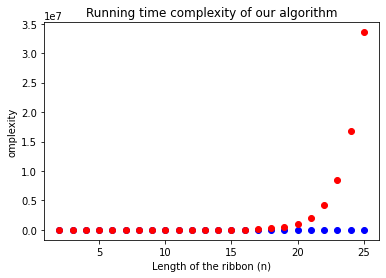

In [51]:
from matplotlib import pyplot as plt

# maximize_value (O(n))

x_values1 = [i for i in range(2, 26)]
y_values1 = x_values1


# FindMaxProdRec (O(2^n))

x_values2 = x_values1
y_values2 = [2**i for i in range(2, 26)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_values1, y_values1, c = 'b', label = 'Linear solution')
ax1.scatter(x_values2, y_values2, c = 'r', label = 'Exponential solution')

plt.xlabel('Length of the ribbon (n)')
plt.ylabel('omplexity')
plt.title('Running time complexity of our algorithm')

### Timeit comparison

#### Maximize_value

In [39]:
out1 = []

for i in range(2, 26):
    res = %timeit -o maximize_value(i, i)
    out1.append(str(res))

260 ns ± 23.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
326 ns ± 41.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.28 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.91 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.6 µs ± 802 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.16 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.64 µs ± 960 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.26 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.03 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.17 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.2 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.65 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.73 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.08 µs ± 930 ns per loop (mean

In [44]:
times1 = []
for el in out1:
    s = el.split(" ", 1)
    if s[1][0] == "n":
        times1.append(float(s[0])*0.000001) # nanoseconds => divide by 10^6 to get to milliseconds
    elif s[1][0] == "µ":
        times1.append(float(s[0])*0.001) # microseconds => divide by 10^6 to get to milliseconds

#### FindMaxProdRec

In [32]:
out2 = []

for i in range(2, 26):
    res = %timeit -o FindMaxProdRec(i)
    out2.append(str(res))

1.63 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.1 µs ± 483 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.34 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.6 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
43.1 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
93.6 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
131 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
241 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
560 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
987 µs ± 97.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.41 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.92 ms ± 98.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.12

In [45]:
times2 = []
for el in out2:
    s = el.split(" ", 1)
    if s[1][0] == "µ":
        times2.append(float(s[0])*0.001)
    elif s[1][0] == "m":
        times2.append(float(s[0]))
    elif s[1][0] == "s":
        times2.append(float(s[0])*1000)

Text(0.5, 1.0, 'Running time of our algorithm')

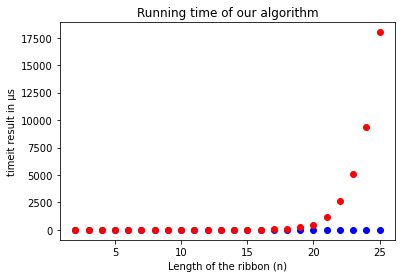

In [43]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(x_values1, times1, c = 'b', label = 'Linear solution')
ax2.scatter(x_values2, times2, c = 'r', label = 'Exponential solution')

plt.xlabel('Length of the ribbon (n)')
plt.ylabel('timeit result in μs')
plt.title('Running time of our algorithm')

### Conclusions

Both plots evaluate the running time of both algorithms `maximize_value` and `FindMaxProdRec` in the range of 2 to 25.

#### Plot 1

The first plot represents a <u>theoretical</u> implementation of what the running times should be according to our intuition.

#### Plot 2

The second plot captures the running times of the two algorithms as n increases (from 2 to 25) according to the <u>%timeit</u> function that measures the execution time of our code, in this case, the two implemented functions.

Comparing the two plots we can clearly see that `maximize_value` (blue line) runs in a linear time and `FindMaxProdRec`(red line) runs in an exponential time. For n > 20, we can really start to see a difference between their execution (running) times: `FindMaxProdRec` becomes unpractical. In fact, for even bigger values of n, our computer is not able to run the function unlike `maximize_value` which returns the expected output instantly.